In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('SBAnational.csv')

C:\Users\Marie\Anaconda3\envs\geo\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Data Analysis

In [3]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
df.shape

(899164, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

### Data types

First I will change the type of the columns that are not good:
- dates: ApprovalDate, ChgOffDate, DisbursementDate
- currencies=text to floats: DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv
- year=text to int: ApprovalFY
- categorical=text to 0/1: RevLineCr, LowDoc, MIS_Status

We must keep in mind also that LoanNr_ChkDgt, Zip, NAICS and FranchiseCode are numerical (integers) but are not continuous variables: they represent respectivelly a unique identifier, the borrower's zip code (indicates a location), the North American industry classification system code (indicates the economic sector) and the franchise code (that can be unique for different businesses). We will not use these variables as is for correlations and descriptive analysis.

In [6]:
cols_not_for_EDA=['LoanNr_ChkDgt','Zip','NAICS','FranchiseCode']

#### dates

In [7]:
dates = ['ApprovalDate', 'ChgOffDate', 'DisbursementDate']
currencies = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
cat_yes_no = ['RevLineCr', 'LowDoc', 'MIS_Status']

In [8]:
for col in dates:
    df[col+'_date']=pd.to_datetime(df[col])

In [9]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalDate_date,ChgOffDate_date,DisbursementDate_date
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",1997-02-28,NaT,1999-02-28
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",1997-02-28,NaT,1997-05-31
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",1997-02-28,NaT,1997-12-31
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",1997-02-28,NaT,1997-06-30
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",1997-02-28,NaT,1997-05-14


#### currencies

In [10]:
df[currencies]=df[currencies].applymap(lambda x: float(x[1:].replace(',','')))

In [11]:
df[currencies].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


#### year

In [12]:
df.ApprovalFY.nunique()

70

In [13]:
df.ApprovalFY.value_counts()

2006    76040
2007    71876
2003    58193
2005    52912
1995    45758
        ...  
1968        1
1967        1
1966        1
1965        1
1962        1
Name: ApprovalFY, Length: 70, dtype: int64

In [14]:
df.loc[df.ApprovalFY.apply(lambda x: len(str(x))!=4)].ApprovalFY

699732    1976A
704030    1976A
705375    1976A
710381    1976A
713245    1976A
748029    1976A
751519    1976A
769515    1976A
775002    1976A
775430    1976A
775978    1976A
776367    1976A
780120    1976A
781090    1976A
784351    1976A
788539    1976A
788661    1976A
793733    1976A
Name: ApprovalFY, dtype: object

column ApprovalFY is Object (text type) because of a few values that are '1976A'


there are also values that are the same but different type (example: 2005 (int) and '2005' (str))

In [15]:
df.ApprovalFY=df.ApprovalFY.apply(lambda x: int(x) if str(x).isdigit() else int(x[:4]))

In [16]:
df.ApprovalFY.nunique()

51

#### categorical

In [17]:
df.RevLineCr.value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
4         1
A         1
7         1
,         1
5         1
.         1
3         1
Q         1
-         1
Name: RevLineCr, dtype: int64

I suppose that 1 and T corresponds to YES  / 0 corresponds to NO  


the rest will be a missing value

In [18]:
df['Is_RevLineCr']=df.RevLineCr.apply(lambda x: 1 if x=='Y' else 1 if x=='T' else 1 if x=='1' else 0 if x=='N' else 0 if x=='0' else None )

In [19]:
df.LowDoc.value_counts()

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

like for RevLineCr, I suppose that 1 corresponds to YES  / 0 corresponds to NO  


the rest will be a missing value

In [20]:
df['Is_LowDoc']=df.LowDoc.apply(lambda x: 1 if x=='Y' else 1 if x=='1' else 0 if x=='N' else 0 if x=='0' else None )

In [21]:
df.MIS_Status.value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

I will try to predict if the loan will be charged off (so that we don't approve the loan)

In [22]:
df['Is_CHGOFF']=df.MIS_Status.map({'CHGOFF':1,'P I F':0})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   LoanNr_ChkDgt          899164 non-null  int64         
 1   Name                   899150 non-null  object        
 2   City                   899134 non-null  object        
 3   State                  899150 non-null  object        
 4   Zip                    899164 non-null  int64         
 5   Bank                   897605 non-null  object        
 6   BankState              897598 non-null  object        
 7   NAICS                  899164 non-null  int64         
 8   ApprovalDate           899164 non-null  object        
 9   ApprovalFY             899164 non-null  int64         
 10  Term                   899164 non-null  int64         
 11  NoEmp                  899164 non-null  int64         
 12  NewExist               899028 non-null  floa

In [24]:
cols_to_drop = dates + cat_yes_no

### missing values

In [25]:
df.isna().sum()

LoanNr_ChkDgt                 0
Name                         14
City                         30
State                        14
Zip                           0
Bank                       1559
BankState                  1566
NAICS                         0
ApprovalDate                  0
ApprovalFY                    0
Term                          0
NoEmp                         0
NewExist                    136
CreateJob                     0
RetainedJob                   0
FranchiseCode                 0
UrbanRural                    0
RevLineCr                  4528
LowDoc                     2582
ChgOffDate               736465
DisbursementDate           2368
DisbursementGross             0
BalanceGross                  0
MIS_Status                 1997
ChgOffPrinGr                  0
GrAppv                        0
SBA_Appv                      0
ApprovalDate_date             0
ChgOffDate_date          736465
DisbursementDate_date      2368
Is_RevLineCr               4570
Is_LowDo

- we have a few missing values for Name and City, but we won't need these info for the prediction so we will drop the columns
- a few missing values also for State, but we will need this feature because states have different economic environments that can influence the default rate. I will fill the missing values with info from the Zip code where there are no missing values
- Bank and BankState have missing values, but we won't use these info for the prediction, so we will drop the columns
- NewExist has a few missing values. The fact that a business is new (less than 2 years) or is active for more than 2 years  can influence the default rate. I will try to fill the missing values if possible else I will drop the rows
- ChgOffDate has a lot of missing values: it is normal since all the paid in full loans have not been declared charged off (the numbers are close: 736465 missing values / 739609 PIF loans
- DisbursementDate has missing values whereas ApprovalDate has none. If we need to use these info for the model, I will use Approval date? I need to investigate more about this
- Is_RevLineCr and Is_LowDoc have missing values. I am not sure if these feature can influence the default rate. If they don't, I will drop the columns; if they do, I will try to fill the missing values else drop the rows  
- Is_CHGOFF has missing values. It is the target column, so if I can't fill the missing values, I will drop the rows

In [26]:
cols_to_drop.extend(['Name','City','Bank','BankState'])

### descriptive statistics

In [27]:
numeric_cols=['ApprovalFY','Term','NoEmp','CreateJob','RetainedJob','DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']

In [28]:
df[numeric_cols].describe()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05,8.991640e+05
mean,2001.143560,110.773078,11.411353,8.430376,10.797257,2.011540e+05,2.989349,1.350330e+04,1.926870e+05,1.494888e+05
std,5.913846,78.857305,74.108196,236.688165,237.120600,2.876408e+05,1442.161912,6.515229e+04,2.832634e+05,2.284146e+05
min,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,1997.000000,60.000000,2.000000,0.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,2002.000000,84.000000,4.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,2006.000000,120.000000,10.000000,1.000000,4.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,2014.000000,569.000000,9999.000000,8800.000000,9500.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


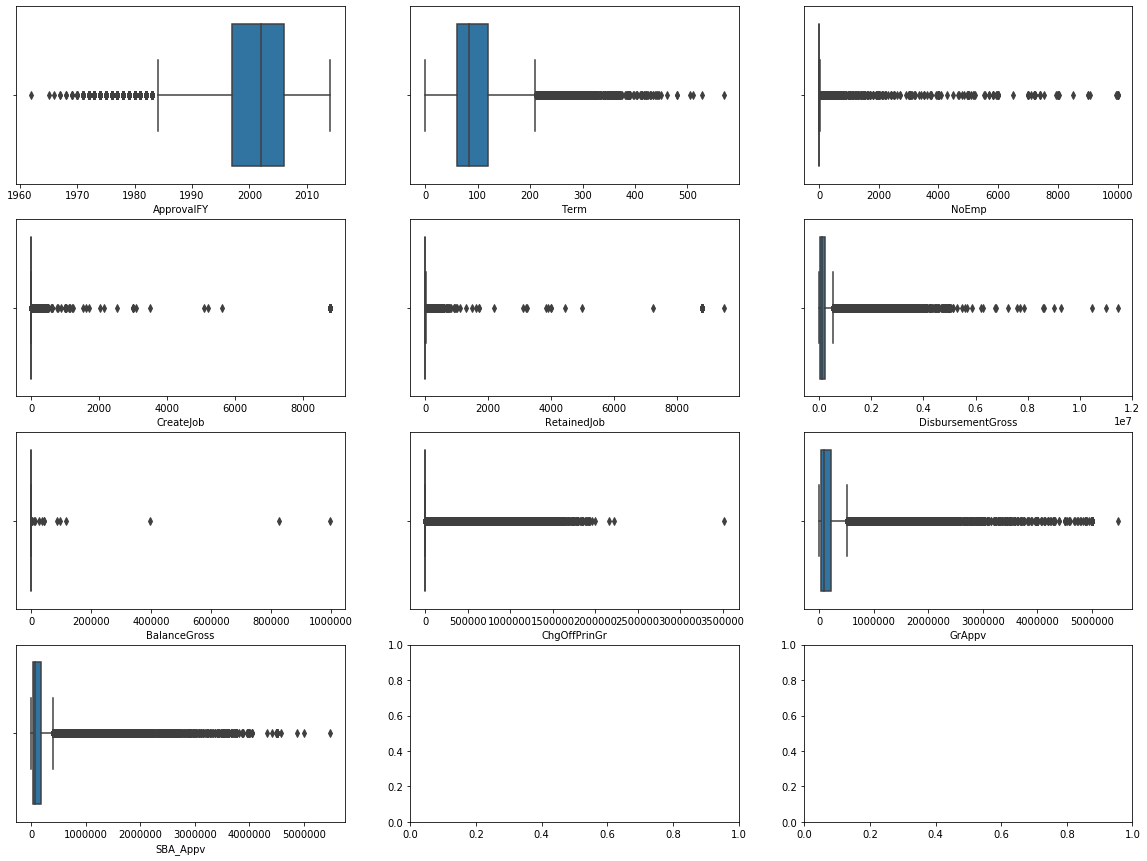

In [29]:
f1, axes = plt.subplots(4,3,figsize = (20,15))
for i,col in enumerate(numeric_cols):
    j,k= i//3,i%3
    sns.boxplot(df[col],ax=axes[j,k])

 **ApprovalFY**: there seems to be outliers from the 60's to the beginning of the 80's. We will need to verify if these loans are comparable to the others: if we want to make a decision on future loans, maybe including such old loans in the model is not relevant ?

 **Term**: the boxplot shows outliers for a term > 200 months. 

from this [document](https://www.sba.gov/sites/default/files/SDOLoanFactSheet_Oct_2011.pdf), we learn that: 
- the maximum duration of a loan is 25 years (=300 months) for real estate acquisition or construction
- other loans are limited to 10 years (=120 months)
- working capital loans are generally limited to 7 years (=84 months)

- the maximum amount of a loan is $5M

maybe the highest terms correspond to errors ? 500 months might be in fact 50 months ? 

**NoEmp, CreateJob and RetainedJob**: a lot of outliers. For the majority of the loans, these values are < 10: it seems normal for Small Businesses to have a small number of employees, to create and/or retain a small number of jobs. But these variables can take values up to almost 10000.

**BalanceGross and ChgOffPrinGr**: more than 75% of the values for these 2 columns are zeros. 
- For BalanceGross, from the boxplot, it is much more than 75%: it may be a low variance variable.
- For ChgOffPrinGr, 0 corresponds to a paid in full loan, so it is quite normal to have a lot of zeros.

**GrAppv and SBA_Appv** have a very similar distribution of values

### correlations

<Figure size 1080x1080 with 0 Axes>

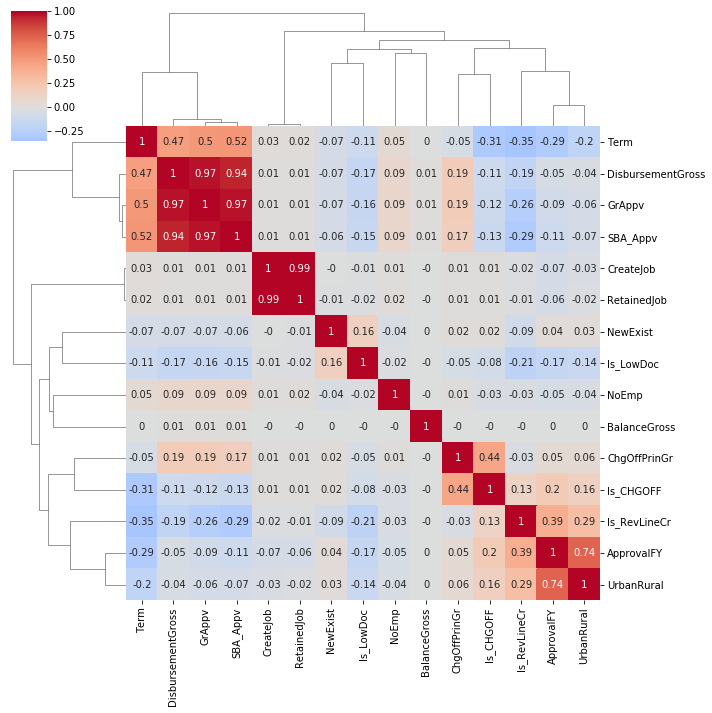

In [31]:
plt.figure(figsize=(15,15))
sns.clustermap(round(df[[col for col in df.columns if col not in cols_to_drop+cols_not_for_EDA]].corr(),2),cmap='coolwarm', center=0,annot=True)
plt.show()

- Is_CHGOFF (the target) and ChgOffPrinGr are correlated (0.44): this is explained by the fact that ChgOffPrinGr is the Charged-off amount, which is 0 for paid in full loans (Is_CHGOFF = 0)


- CreateJob and RetainedJob are highly correlated (0.99)
- disbursementGross is highly correlated with GrAppv (0.97) and SBA_Appv (0.94) AND GrAppv is highly correlated with SBA_Appv:
disbursement gross should be close or equal to the GrAppv, and SBA_Appv is a portion of GrAppv, these can explain the high correlation
- ApprovalFY and UrbanRural are highly correlated (0.74) ???
- GrAppv and Term are correlated (0.5): the bigger the amount of the loan is, the more time is needed to pay in full
- Term is also correlated with SBA_Appv (0.52) and DisbursementGross (0.47): logical since the 3 amounts are highly correlated


# Feature Engineering

## Missing values

#### Is_CHGOFF

assomptions :

1. if the charged-off amount is 0, then the status must be P I F 
2. if there is a chargeoff date, then status must be CHGOFF

I will try to verify these assomptions

1.

do all the paid in full loans have a ChgOffPrinGr =0 ?

In [32]:
df.loc[(df.Is_CHGOFF==0)].ChgOffPrinGr.value_counts().sort_index()

0.0         734725
1.0              4
3.0              1
4.0              1
5.0              1
             ...  
821922.0         1
888113.0         1
913117.0         1
946900.0         1
990516.0         1
Name: ChgOffPrinGr, Length: 4172, dtype: int64

- most of paid in full actually have a ChgOffPrinGr = 0
- but a lot of other values, errors ??? 

are the errors in the MIS_Status column or in the ChgOffPrinGr column ???

In [33]:
df.loc[(df.Is_CHGOFF==0)&(df.ChgOffPrinGr>0)].ChgOffDate.isna().sum()

0

so all the rows with charged off amounts >0 have a charged off date: this means that the error is in the MIS_status column !

I change the value of Is_CHGOFF to 1 for all the ChgOffPrinGr>0

In [34]:
df.loc[(df.Is_CHGOFF==0)&(df.ChgOffPrinGr>0),'Is_CHGOFF']=1

1.    

are all the ChgOffPrinGr =0 paid in full ?

In [35]:
df.loc[(df.ChgOffPrinGr==0)].Is_CHGOFF.value_counts()

0.0    734725
1.0       687
Name: Is_CHGOFF, dtype: int64

In [36]:
df.loc[(df.ChgOffPrinGr==0)&(df.Is_CHGOFF==1)].ChgOffDate.isna().sum()

47

if ChgOffPrinGr==0 and no charged off date: status must be PIF

In [37]:
df.loc[(df.Is_CHGOFF==1)&(df.ChgOffPrinGr==0)&(df.ChgOffDate.isna()),'Is_CHGOFF']=0

2.    

In [38]:
df.loc[df.ChgOffDate.isna()].Is_CHGOFF.value_counts()

0.0    734729
Name: Is_CHGOFF, dtype: int64

where there is no charge off date, the loan is paid in full

In [39]:
df.loc[df.ChgOffDate.isna()].Is_CHGOFF.isna().sum()

1736

so I fill the Is_CHGOFF missing values with 0 (=paid in full) where there is no charge off date

In [40]:
df.loc[(df.ChgOffDate.isna()),'Is_CHGOFF']=0

In [41]:
df.Is_CHGOFF.isna().sum()

261

there are still missing values

In [42]:
df.loc[(df.Is_CHGOFF.isna())].ChgOffDate.isna().sum()

0

where there are missing values in the Is_CHGOFF column, there are no missing values for the charge off date (= there is a charge off date = the loan is charged off)

In [43]:
df.Is_CHGOFF.fillna(1,inplace=True)

In [44]:
df.Is_CHGOFF.value_counts()

0.0    736508
1.0    162656
Name: Is_CHGOFF, dtype: int64

In [45]:
print('the total default rate is {}%'.format(round(len(df.loc[df.Is_CHGOFF==1])/len(df)*100,2)))

the total default rate is 18.09%


#### State

In [46]:
def state_mode(z):
    return df[['Zip','State']].loc[df.Zip==z].mode()['State'][0]


In [47]:
df.loc[df.State.isna(),'State']=df.loc[df.State.isna(),'Zip'].map(state_mode)

In [48]:
df.loc[df.State.isna()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalDate_date,ChgOffDate_date,DisbursementDate_date,Is_RevLineCr,Is_LowDoc,Is_CHGOFF
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,...,CHGOFF,30589.0,50000.0,45000.0,1988-01-21,1993-09-18,1988-03-16,0.0,0.0,1.0


zip code = 96205 corresponds to Armed Forces Pacific (AP)

In [49]:
df.loc[df.State=='AP']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalDate_date,ChgOffDate_date,DisbursementDate_date,Is_RevLineCr,Is_LowDoc,Is_CHGOFF


it is the only one: we will remove it

In [50]:
cols_dropna_row = ['State']

In [51]:
state_df = df[['State','Is_CHGOFF']].groupby('State',as_index=False).mean().sort_values('Is_CHGOFF',ascending=False)

In [52]:
state_df.rename(columns={'State':'State', 'Is_CHGOFF': 'Default_rate'},inplace=True)

In [53]:
state_df.Default_rate=state_df.Default_rate*100

In [54]:
round(state_df)

,State,Default_rate
9,FL,28.0
7,DC,27.0
10,GA,25.0
33,NV,24.0
14,IL,23.0
22,MI,23.0
42,TN,22.0
40,SC,21.0
20,MD,21.0
3,AZ,21.0


there really is a difference between states: the default rate is between 7 and 28 %

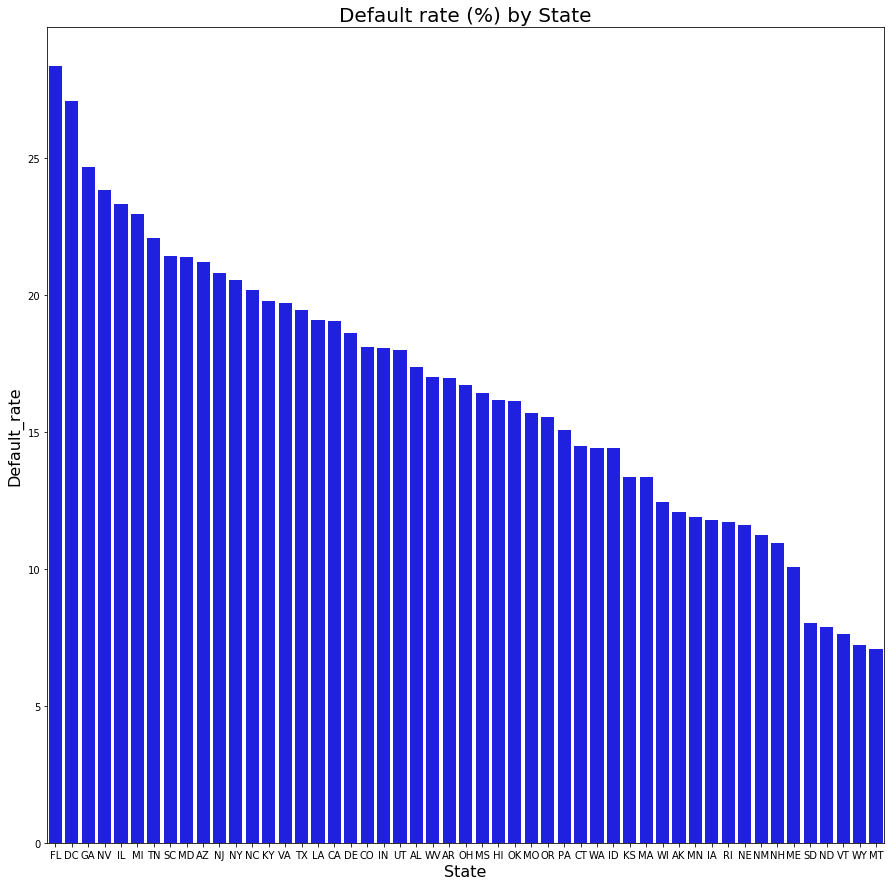

In [55]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

sns.barplot(x='State',y='Default_rate',data=state_df, color = 'blue',ax=ax)
ax.title.set_text('Default rate (%) by State')
ax.title.set_size(20)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.savefig('images/states.svg', format='svg')
plt.savefig('images/states.png', format='png')
plt.show()

#### creating a geographic graph

with a USA shapefile from [here](https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5)

In [56]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [57]:
usa = gpd.read_file('states.shp')

In [58]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


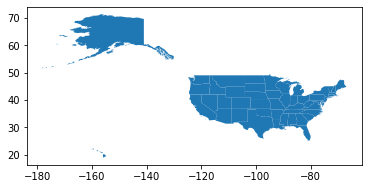

In [59]:
usa.plot()

In [60]:
usa.shape

(51, 6)

In [62]:
usa_default_rate=usa.merge(state_df, how='left',left_on='STATE_ABBR', right_on='State')

In [63]:
usa_default_rate.shape

(51, 8)

In [64]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [128]:
usa_default_rate["x"] = usa_default_rate.centroid.map(lambda p: p.x)
usa_default_rate["y"] = usa_default_rate.centroid.map(lambda p: p.y)

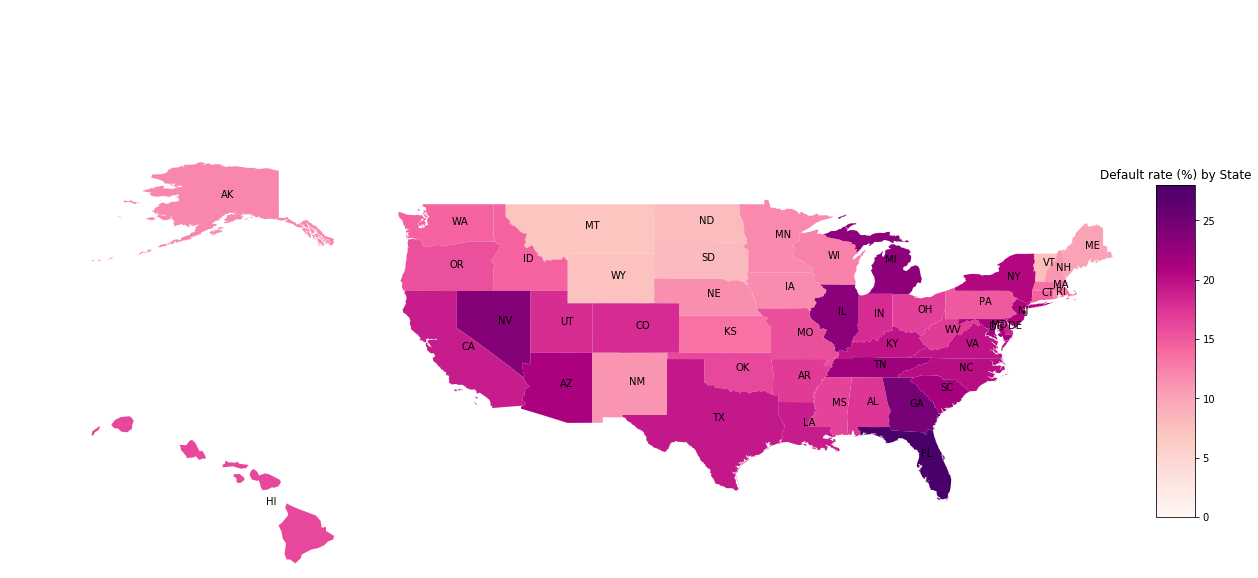

In [136]:
cmap = 'RdPu'

fig = plt.figure(figsize=(20,10))
grid=plt.GridSpec(10,20, wspace=0.4, hspace=0.3)

main = fig.add_subplot(grid[:,5:])
ak = fig.add_subplot(grid[:5,:5])
hi = fig.add_subplot(grid[5:,:5])

main.set_aspect('equal')
main.set_axis_off()
ak.set_aspect('equal')
ak.set_axis_off()
hi.set_aspect('equal')
hi.set_axis_off()
    
divider = make_axes_locatable(main)
cax = divider.append_axes("right", size="5%", pad=0.1)


usa_default_rate.loc[(usa_default_rate.State!='HI')& (usa_default_rate.State!='AK')].plot(ax = main, column='Default_rate', cmap = cmap, legend=True, vmin=0, vmax=28, cax=cax)
usa_default_rate.loc[(usa_default_rate.State=='HI')].plot(ax = hi, column='Default_rate', cmap = cmap, vmin=0, vmax=28)
usa_default_rate.loc[(usa_default_rate.State=='AK')].plot(ax = ak, column='Default_rate', cmap = cmap, vmin=0, vmax=28)


for x, y, label in zip(usa_default_rate.x, usa_default_rate.y, usa_default_rate.State):
    main.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

hi.annotate('HI', xy=(usa_default_rate.loc[(usa_default_rate.State=='HI')].x, usa_default_rate.loc[(usa_default_rate.State=='HI')].y), xytext=(0, 0), textcoords="offset points")
ak.annotate('AK', xy=(usa_default_rate.loc[(usa_default_rate.State=='AK')].x, usa_default_rate.loc[(usa_default_rate.State=='AK')].y), xytext=(0, 0), textcoords="offset points")

plt.title('Default rate (%) by State')

plt.savefig('images/states_map2.svg', format='svg')
plt.savefig('images/states_map2.png', format='png')

plt.show()

#### NewExist

In [55]:
df.NewExist.value_counts()

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

- 1 is existing business
- 2 is new business
- 0 is undefined, so kind of the same as missing values

In [56]:
df.NewExist.fillna(0,inplace=True)

In [57]:
df.NewExist.value_counts()/df.shape[0]*100

1.0    71.718730
2.0    28.151149
0.0     0.130121
Name: NewExist, dtype: float64

In [58]:
round(df[['NewExist','Is_CHGOFF']].groupby('NewExist').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
NewExist,
0.0,0.07
1.0,0.18
2.0,0.19


there seem to be a difference between existing and new businesses: as expected, the default rate for existing businesses is lower than the one for new businesses. Is the difference significant ?

In [59]:
from scipy.stats import ttest_ind

In [60]:
ttest_ind(df.loc[df.NewExist==1, 'Is_CHGOFF'],
          df.loc[df.NewExist==2, 'Is_CHGOFF'],
         equal_var=False)

Ttest_indResult(statistic=-19.536079691262255, pvalue=5.880155645889828e-85)

the p-value is << 0.05 : the difference is statistically significant

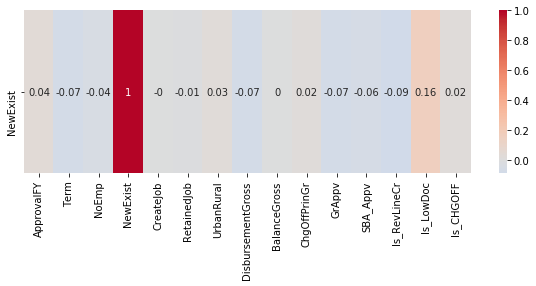

In [61]:
plt.figure(figsize=(10,3))
sns.heatmap(round(df[[col for col in df.columns if col not in cols_to_drop+cols_not_for_EDA]].corr()[['NewExist']].T,2),cmap='coolwarm', center=0,annot=True)

- I don't see any correlation between NewExist and other columns. 
- The dataset is too big to try a missing values imputation technique like KNN.
- The number of missing values is relatively small (0.1%)


I will drop the missing values

In [62]:
df['Is_New']=df.NewExist.apply(lambda x: 1 if x==2 else 0 if x==1 else None)

In [63]:
new_df = df[['Is_New','Is_CHGOFF']].groupby('Is_New',as_index=False).mean().sort_values('Is_CHGOFF',ascending=False)

In [64]:
new_df.rename(columns={'Is_New':'Is_New', 'Is_CHGOFF': 'Default_rate'},inplace=True)

In [65]:
new_df.Default_rate=new_df.Default_rate*100

In [66]:
new_df.Is_New=new_df.Is_New.map({1:'New',0:'Existing'})

In [67]:
round(new_df)

,Is_New,Default_rate
1,New,19.0
0,Existing,18.0


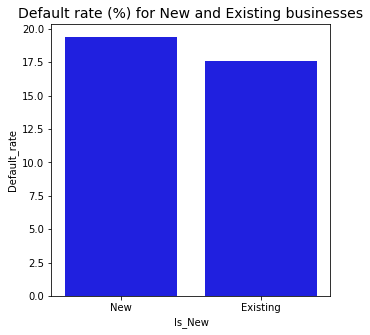

In [68]:
fig2, ax = plt.subplots(1,1,figsize=(5,5))

sns.barplot(x='Is_New',y='Default_rate',data=new_df, color = 'blue',ax=ax)
ax.title.set_text('Default rate (%) for New and Existing businesses')
ax.title.set_size(14)
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
plt.savefig('images/new.svg', format='svg')
plt.savefig('images/new.png', format='png')
plt.show()

In [69]:
cols_to_drop.append('NewExist')

In [70]:
cols_dropna_row.append('Is_New')

### Is_RevLineCr

In [71]:
df.Is_RevLineCr.value_counts()

0.0    677890
1.0    216704
Name: Is_RevLineCr, dtype: int64

In [72]:
round(df[['Is_RevLineCr','Is_CHGOFF']].groupby('Is_RevLineCr').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
Is_RevLineCr,
0.0,0.15
1.0,0.27


the correlation between Is_RevLineCr and ApprovalFY is 0.39

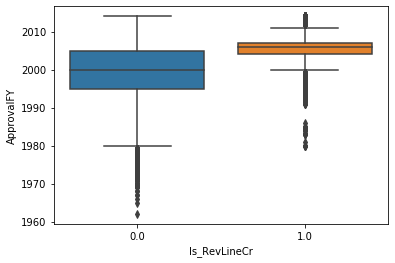

In [73]:
sns.boxplot(x=df.Is_RevLineCr, y=df.ApprovalFY);

maybe the revolving line of credit started in the 1980s ?

the difference in default rate could be explained by the fact that the loans with revolving line of credit are more recent and include proportionnaly more very recent loans: all loans included in the dataset have known outcome, so recent loans can be short term loans (paid in full or charged off)  or long term loans charged off

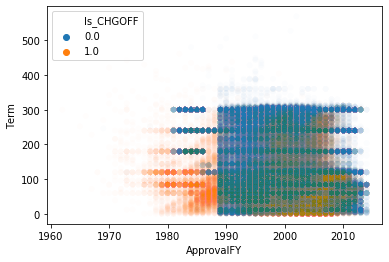

In [74]:
sns.scatterplot(x='ApprovalFY',y='Term',data=df,hue='Is_CHGOFF',alpha=0.01);

from this graph, it seems that before 1989, most of the loans where charged off

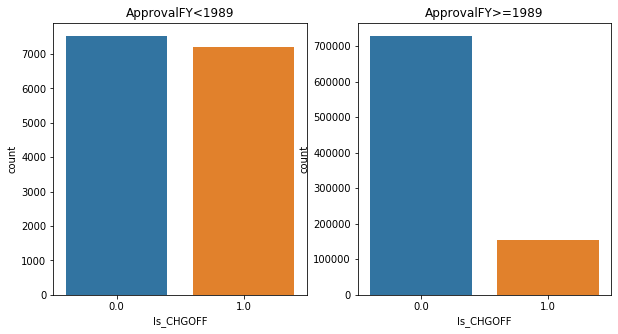

In [75]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.countplot(df.loc[(df.ApprovalFY<1989)].Is_CHGOFF,ax=ax1).set_title('ApprovalFY<1989')
sns.countplot(df.loc[df.ApprovalFY>=1989].Is_CHGOFF, ax=ax2).set_title('ApprovalFY>=1989')
plt.show()

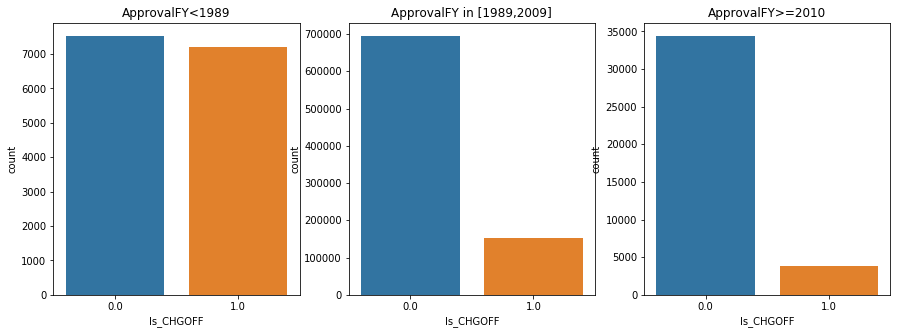

In [76]:
f1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

sns.countplot(df.loc[(df.ApprovalFY<1989)].Is_CHGOFF,ax=ax1).set_title('ApprovalFY<1989')
sns.countplot(df.loc[(df.ApprovalFY>=1989)&(df.ApprovalFY<2010)].Is_CHGOFF, ax=ax2).set_title('ApprovalFY in [1989,2009]')
sns.countplot(df.loc[df.ApprovalFY>=2010].Is_CHGOFF, ax=ax3).set_title('ApprovalFY>=2010')
plt.show()

so the hypothesis is wrong: in the recent years the default rate decreases

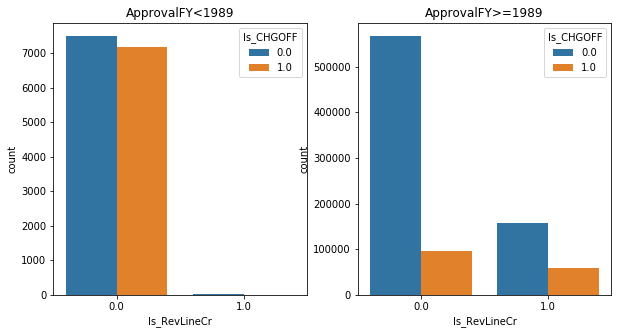

In [77]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.countplot(x='Is_RevLineCr',data=df.loc[(df.ApprovalFY<1989)],hue='Is_CHGOFF',ax=ax1).set_title('ApprovalFY<1989')
sns.countplot(x='Is_RevLineCr',data=df.loc[df.ApprovalFY>=1989],hue='Is_CHGOFF', ax=ax2).set_title('ApprovalFY>=1989')
plt.show()

In [78]:
df.loc[df.ApprovalFY<1989]['Is_RevLineCr'].value_counts()

0.0    14686
1.0       29
Name: Is_RevLineCr, dtype: int64

there are almost no loans with revolving lines of credit before 1989.

In [79]:
print('the loans approved before 1989 represent {}% of the dataset'.format(round(len(df[df.ApprovalFY<1989])/len(df)*100,2)))

the loans approved before 1989 represent 1.64% of the dataset


In [80]:
round(df.loc[df.ApprovalFY>=1989][['Is_RevLineCr','Is_CHGOFF']].groupby('Is_RevLineCr').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
Is_RevLineCr,
0.0,0.14
1.0,0.27


In [81]:
round(df.loc[df.ApprovalFY>=2010][['Is_RevLineCr','Is_CHGOFF']].groupby('Is_RevLineCr').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
Is_RevLineCr,
1.0,0.08
0.0,0.11


where are the missing values ?

In [82]:
df_revline_test=df.copy()

In [83]:
df_revline_test.Is_RevLineCr.fillna(-1,inplace=True)

In [84]:
df_revline_test.Is_RevLineCr.value_counts()/df_revline_test.shape[0]*100

 0.0    75.391141
 1.0    24.100609
-1.0     0.508250
Name: Is_RevLineCr, dtype: float64

In [85]:
round(df_revline_test[['Is_RevLineCr','Is_CHGOFF']].groupby('Is_RevLineCr').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
Is_RevLineCr,
-1.0,0.03
0.0,0.15
1.0,0.27


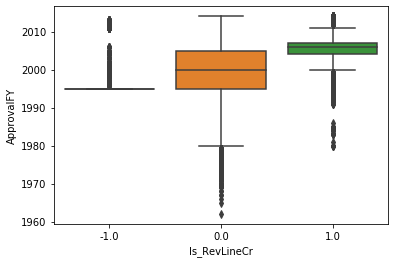

In [86]:
sns.boxplot(x=df_revline_test.Is_RevLineCr, y=df_revline_test.ApprovalFY);

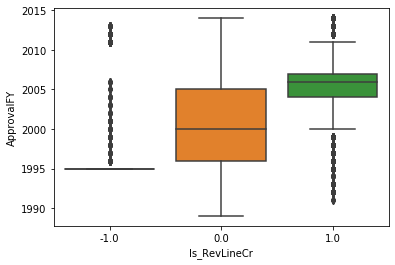

In [87]:
sns.boxplot(x=df_revline_test.loc[df.ApprovalFY>=1989].Is_RevLineCr, y=df_revline_test.loc[df.ApprovalFY>=1989].ApprovalFY);

most missing values are from 1995, where Is_RevLineCr was mostly 0

for now I will fill the missing values of Is_RevLineCr with 0 

we will try models with this feature and see if it is important and if not, we will drop the column to improve the model

In [88]:
df.Is_RevLineCr.fillna(0,inplace=True)

In [89]:
revline_df = df[['Is_RevLineCr','Is_CHGOFF']].groupby('Is_RevLineCr',as_index=False).mean().sort_values('Is_CHGOFF',ascending=False)

In [90]:
revline_df.rename(columns={'Is_RevLineCr':'Is_RevLineCr', 'Is_CHGOFF': 'Default_rate'},inplace=True)

In [91]:
revline_df.Default_rate=revline_df.Default_rate*100

In [93]:
revline_df.Is_RevLineCr=revline_df.Is_RevLineCr.map({1:'Yes',0:'No'})

In [94]:
round(revline_df)

,Is_RevLineCr,Default_rate
1,Yes,27.0
0,No,15.0


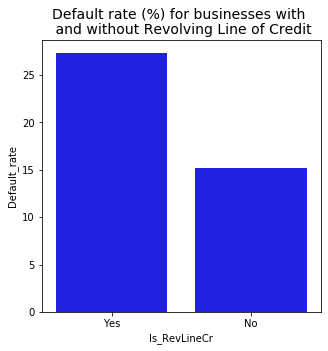

In [335]:
fig3, ax = plt.subplots(1,1,figsize=(5,5))

sns.barplot(x='Is_RevLineCr',y='Default_rate',data=revline_df, color = 'blue',ax=ax)
ax.title.set_text('Default rate (%) for businesses with \n and without Revolving Line of Credit')
ax.title.set_size(14)
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
plt.savefig('images/revlinecr.svg', format='svg')
plt.savefig('images/revlinecr.png', format='png')
plt.show()

### Is_LowDoc

In [97]:
df.Is_LowDoc.value_counts()

0.0    784313
1.0    110336
Name: Is_LowDoc, dtype: int64

In [98]:
df.Is_LowDoc.isna().sum()

4515

“LowDoc Loan” program was implemented where loans under $150,000 can be processed using a one-page application. 

So for the loans > $150,000 (GrAppv or disbursementGross ?), Is_LowDoc value should be 0

In [99]:
df.loc[(df.Is_LowDoc==1)&(df.GrAppv>150000)][['ApprovalDate','DisbursementDate','Is_CHGOFF','GrAppv','DisbursementGross','SBA_Appv']]

,ApprovalDate,DisbursementDate,Is_CHGOFF,GrAppv,DisbursementGross,SBA_Appv
76702,24-Sep-97,30-Nov-97,0.0,190000.0,190000.0,142500.0
136428,11-May-06,31-Jul-06,0.0,797345.0,797345.0,598009.0
330721,25-Oct-99,31-Oct-99,1.0,180000.0,180000.0,135000.0
575180,6-Sep-02,31-Oct-02,1.0,162000.0,162000.0,121500.0
663973,25-Sep-03,25-Sep-04,0.0,180000.0,180000.0,153000.0
697763,8-Mar-04,31-Jul-04,0.0,160568.0,139784.0,120426.0
708361,20-Apr-04,31-Jul-04,0.0,172800.0,172800.0,129600.0
739680,19-Oct-94,31-Jan-95,0.0,214362.0,214362.0,160772.0
756516,16-Dec-94,30-Apr-95,0.0,304000.0,30400.0,273600.0
764439,26-Jan-95,31-Jul-95,0.0,750000.0,75000.0,675000.0


only 17 loans where Is_lowdoc=1 and GrAppv>150000 over more than 110000 loans

for these few loans at least, disbursement Gross is mostly equal to the GrAppv (there might be errors = missing zero in disbursementGross column, since the SBA_Appv is the same order of magnitude as GrAppv ?


In [100]:
df.loc[(df.GrAppv>150000),'Is_LowDoc']=0

In [101]:
df.Is_LowDoc.isna().sum()

3422

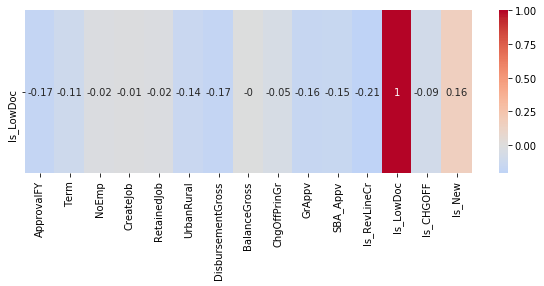

In [102]:
plt.figure(figsize=(10,3))
sns.heatmap(round(df[[col for col in df.columns if col not in cols_to_drop+cols_not_for_EDA]].corr()[['Is_LowDoc']].T,2),cmap='coolwarm', center=0,annot=True)

the highest correlation with Is_LowDoc is with Is_RevLineCr (-0.21)

In [103]:
round(df[['Is_LowDoc','Is_CHGOFF']].groupby('Is_LowDoc').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
Is_LowDoc,
1.0,0.09
0.0,0.19


In [104]:
pd.crosstab(df.Is_LowDoc,df.Is_RevLineCr,rownames=['LowDoc'],colnames=['RevLineCr'],normalize='columns')

RevLineCr,0.0,1.0
LowDoc,,
0.0,0.837829,0.999694
1.0,0.162171,0.000306


allmost all RevLineCr=1 are LowDoc=0
maybe the 2 are incompatible (I didn't find info on that)

In [105]:
df.loc[(df.Is_LowDoc.isna())&(df.Is_RevLineCr==1)].shape

(817, 34)

In [106]:
df.loc[(df.Is_RevLineCr==1),'Is_LowDoc']=0

In [107]:
round(df[['Is_LowDoc','Is_CHGOFF']].groupby('Is_LowDoc').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
Is_LowDoc,
1.0,0.09
0.0,0.19


In [108]:
df.Is_LowDoc.isna().sum()

2605

where are the remaining missing values ?

In [109]:
df_lowdoc_test=df.copy()

In [110]:
df_lowdoc_test.Is_LowDoc.fillna(-1, inplace=True)

In [111]:
round(df_lowdoc_test[['Is_LowDoc','Is_CHGOFF']].groupby('Is_LowDoc').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
Is_LowDoc,
1.0,0.09
0.0,0.19
-1.0,0.44


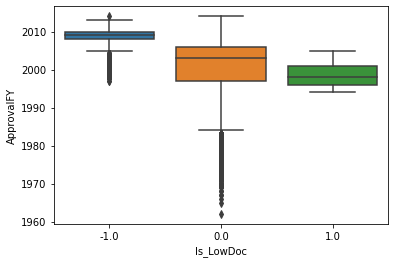

In [112]:
sns.boxplot(x=df_lowdoc_test.Is_LowDoc, y=df_lowdoc_test.ApprovalFY);

In [113]:
df.loc[df.Is_LowDoc==1].ApprovalFY.describe()

count    110253.000000
mean       1998.434727
std           3.250844
min        1994.000000
25%        1996.000000
50%        1998.000000
75%        2001.000000
max        2005.000000
Name: ApprovalFY, dtype: float64

there are no low doc loans accepted before 1994 nor after 2005

this feature is too much localized in time to be relevant for a model: I will drop the column

In [114]:
cols_to_drop.append('Is_LowDoc')

In [115]:
df[[col for col in df.columns if col not in cols_to_drop+cols_dropna_row]].isna().sum()

LoanNr_ChkDgt                 0
Zip                           0
NAICS                         0
ApprovalFY                    0
Term                          0
NoEmp                         0
CreateJob                     0
RetainedJob                   0
FranchiseCode                 0
UrbanRural                    0
DisbursementGross             0
BalanceGross                  0
ChgOffPrinGr                  0
GrAppv                        0
SBA_Appv                      0
ApprovalDate_date             0
ChgOffDate_date          736465
DisbursementDate_date      2368
Is_RevLineCr                  0
Is_CHGOFF                     0
dtype: int64

## Feature engineering and feature selection

- LoanNr_ChkDgt is to be droped: it is the reference number of each loan
- Now that we have filled the missing values of State with Zip, we can drop Zip
- ChgOffDate_date was used to fill the missing values is Is_CHGOFF, it can now be droped
- for DisbursementDate_date we need to investigate whether the date is usefull or can be replaced by ApprovalDate

In [116]:
cols_to_drop.extend(['LoanNr_ChkDgt','Zip','ChgOffDate_date'])

### NAICS

- From NAICS we need the extract the NAICS sector that can be usefull: in different sectors, the default rate can be signicatively different

first 2 digits give the economic sector:

In [121]:
NAICS_dict={'11':'Agriculture',
            '21':'Mining',
            '22':'Utilities',
            '23':'Construction',
            '31':'Manufacturing',
            '32':'Manufacturing',
            '33':'Manufacturing',
           '42':'Wholesale',
           '44':'Retail',
           '45':'Retail',
           '48':'Transportation',
           '49':'Transportation',
           '51':'Information',
           '52':'Finance',
           '53':'Real Estate',
           '54':'Services',
           '55':'Management',
           '56':'Administrative',
           '61':'Educational',
           '62':'Healthcare',
           '71':'Arts',
           '72':'Food',
           '81':'Other services',
           '92':'Public administration'}

In [124]:
df['NAICS_sector']=df.NAICS.apply(lambda x: NAICS_dict[str(x)[:2]] if len(str(x))>=2 else NAICS_dict[str(x)] if str(x)!='0' else 'Other')

In [125]:
df.NAICS_sector.value_counts()

Other                    201948
Retail                   127251
Other services            72618
Services                  68170
Manufacturing             68029
Food                      67600
Construction              66646
Healthcare                55366
Wholesale                 48743
Administrative            32685
Transportation            22531
Arts                      14640
Real Estate               13632
Information               11379
Finance                    9496
Agriculture                9005
Educational                6425
Mining                     1851
Utilities                   663
Management                  257
Public administration       229
Name: NAICS_sector, dtype: int64

In [126]:
df.NAICS_sector.value_counts()/df.shape[0]*100

Other                    22.459529
Retail                   14.152146
Other services            8.076169
Services                  7.581487
Manufacturing             7.565806
Food                      7.518095
Construction              7.411996
Healthcare                6.157497
Wholesale                 5.420924
Administrative            3.635043
Transportation            2.505772
Arts                      1.628179
Real Estate               1.516075
Information               1.265509
Finance                   1.056092
Agriculture               1.001486
Educational               0.714553
Mining                    0.205858
Utilities                 0.073735
Management                0.028582
Public administration     0.025468
Name: NAICS_sector, dtype: float64

In [127]:
sector_df = df[['NAICS_sector','Is_CHGOFF']].groupby('NAICS_sector',as_index=False).mean().sort_values('Is_CHGOFF',ascending=False)

In [128]:
sector_df.rename(columns={'NAICS_sector':'Sector', 'Is_CHGOFF': 'Default_rate'},inplace=True)

In [129]:
sector_df.Default_rate=sector_df.Default_rate*100

In [130]:
round(sector_df)

,Sector,Default_rate
15,Real Estate,29.0
5,Finance,29.0
18,Transportation,27.0
8,Information,26.0
4,Educational,25.0
0,Administrative,24.0
3,Construction,24.0
16,Retail,23.0
6,Food,23.0
2,Arts,21.0


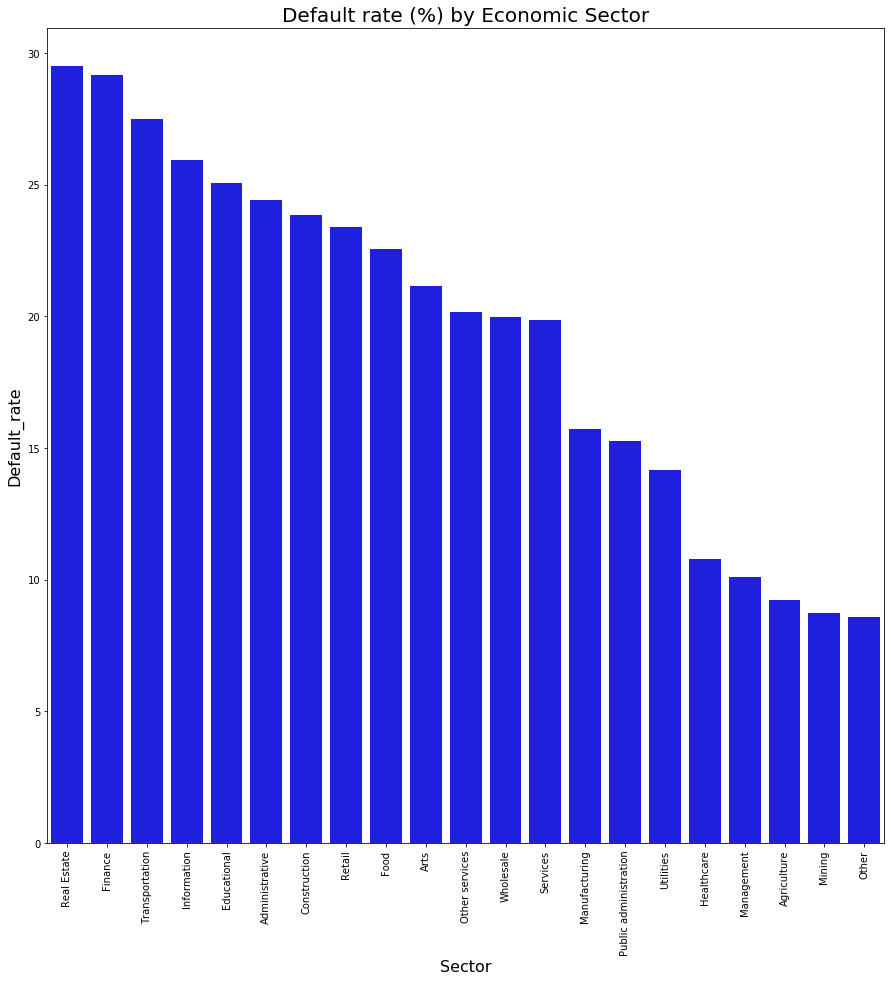

In [134]:
fig4, ax = plt.subplots(1,1,figsize=(15,15))

sns.barplot(x='Sector',y='Default_rate',data=sector_df, color = 'blue',ax=ax)
ax.title.set_text('Default rate (%) by Economic Sector')
ax.title.set_size(20)
plt.xticks(rotation='vertical')
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.savefig('images/sector.svg', format='svg')
plt.savefig('images/sector.png', format='png')
plt.show()

we will need to one-hot encode this feature, but maybe we will only take the categories that represent more than 1 or 2% of the data, for example, leaving the other categories as a feature "sectors represented in less than x% of the data" 

In [135]:
cols_for_dummies = ['NAICS_sector']
cols_to_drop.append('NAICS')

### FranchiseCode

no franchise if franchiseCode= 0 or 1

In [136]:
df['Is_Franchise']=df.FranchiseCode.apply(lambda x: 0 if x==0 else 0 if x==1 else 1)

In [137]:
df.Is_Franchise.value_counts()

0    847389
1     51775
Name: Is_Franchise, dtype: int64

In [138]:
round(df.Is_Franchise.value_counts()/df.shape[0],2)

0    0.94
1    0.06
Name: Is_Franchise, dtype: float64

only 6% of franchised businesses

In [139]:
cols_to_drop.append('FranchiseCode')

In [140]:
round(df[['Is_Franchise','Is_CHGOFF']].groupby('Is_Franchise').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
Is_Franchise,
1,0.15
0,0.18


In [141]:
ttest_ind(df.loc[df.Is_Franchise==1, 'Is_CHGOFF'],
          df.loc[df.Is_Franchise==0, 'Is_CHGOFF'],
         equal_var=False)

Ttest_indResult(statistic=-17.304726917387157, pvalue=6.334051190389597e-67)

the default rate is significatively different for franchised and not franchised businesses


In [142]:
round(df[['NAICS_sector','Is_Franchise']].groupby('NAICS_sector').mean(),2).sort_values('Is_Franchise')

,Is_Franchise
NAICS_sector,
Agriculture,0.00
Mining,0.00
Wholesale,0.01
Construction,0.01
Services,0.01
Finance,0.01
Public administration,0.01
Information,0.01
Transportation,0.02


not surprisingly, agriculture and mining businesses are not franchised; whereas the food business has a relatively high percentage of Franchised businesses

 the franchised businesses are specific to some sectors 
and the franchised businesses represent only a small percentage of the dataset

so I decide to drop the column

In [143]:
cols_to_drop.append('Is_Franchise')

### NoEmp

In [144]:
df.NoEmp.describe()

count    899164.000000
mean         11.411353
std          74.108196
min           0.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        9999.000000
Name: NoEmp, dtype: float64

In [145]:
df[['NoEmp','Is_CHGOFF']].groupby('Is_CHGOFF').describe()

NoEmp                                                   
              count       mean        std  min  25%  50%   75%     max
Is_CHGOFF                                                             
0.0        736508.0  12.340443  75.868845  0.0  2.0  5.0  11.0  9999.0
1.0        162656.0   7.204425  65.381904  0.0  2.0  3.0   7.0  9999.0

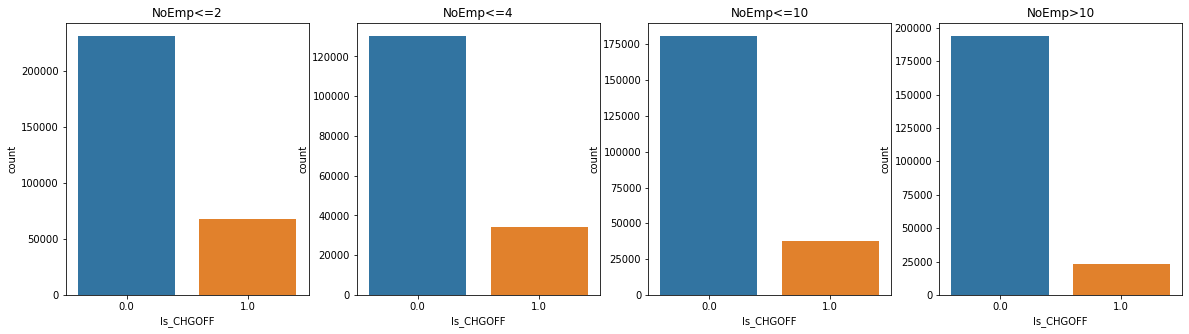

In [146]:
h, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (20,5))

sns.countplot(df.loc[df.NoEmp<=2].Is_CHGOFF,ax=ax1).set_title('NoEmp<=2')
sns.countplot(df.loc[(df.NoEmp>2)&(df.NoEmp<=4)].Is_CHGOFF,ax=ax2).set_title('NoEmp<=4')
sns.countplot(df.loc[(df.NoEmp>4)&(df.NoEmp<=10)].Is_CHGOFF,ax=ax3).set_title('NoEmp<=10')
sns.countplot(df.loc[(df.NoEmp>10)].Is_CHGOFF, ax=ax4).set_title('NoEmp>10')

plt.show()

maybe business with only a few or no employees are mostly new businesses that are more fragile ?

In [147]:
df[['NoEmp','Is_New']].groupby('Is_New').describe()

NoEmp                                                   
           count       mean        std  min  25%  50%   75%     max
Is_New                                                             
0.0     644869.0  13.256068  75.792664  0.0  2.0  5.0  12.0  9999.0
1.0     253125.0   6.670799  68.819799  0.0  1.0  2.0   5.0  9999.0

So, yes: new businesses have less employees on average
    
one question remains to me will this column: the dataset is about small businesses (SBA...) so the number of employees should be somehow less than 150 ? and yet we have values up to 9999

In [148]:
df.loc[df.NoEmp>150].shape[0]/df.shape[0]*100

0.3562197774821946

less than 0.5% of the data has more than 150 employees

In [149]:
df['NoEmp_150']=df.NoEmp.copy()

In [150]:
df.loc[df.NoEmp>150,'NoEmp_150']=np.nan

I will only keep the rows with 150 employees or less

In [151]:
cols_to_drop.append('NoEmp')
cols_dropna_row.append('NoEmp_150')

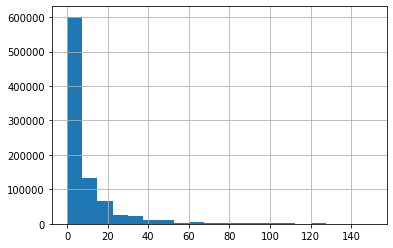

In [152]:
df.NoEmp_150.hist(bins=20)

I will need to take the log of the NoEmp column

C:\Users\Marie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Marie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Marie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Marie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Marie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Marie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: inva

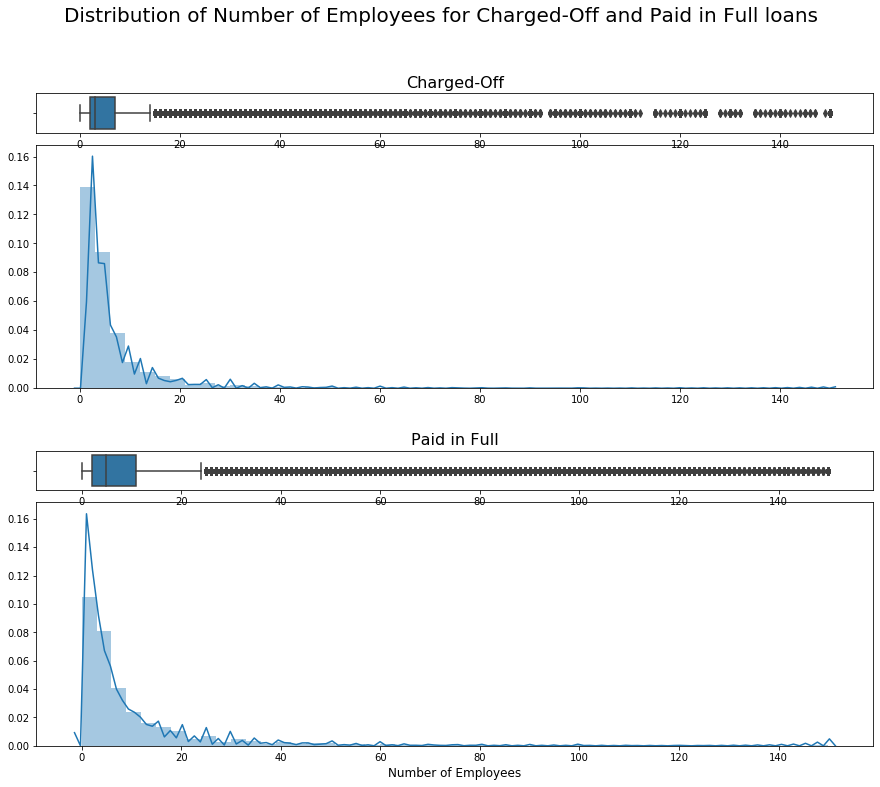

In [185]:
fig=plt.figure(figsize=(15,12))
grid=plt.GridSpec(13,1, wspace=0.4, hspace=0.3)

fig.suptitle('Distribution of Number of Employees for Charged-Off and Paid in Full loans', size=20)

yes_hist=fig.add_subplot(grid[1:6,:])
yes_box=fig.add_subplot(grid[0,:], sharex=yes_hist)


no_hist=fig.add_subplot(grid[8:13,:])
no_box=fig.add_subplot(grid[7,:], sharex=no_hist)


sns.boxplot(df.loc[df.Is_CHGOFF==1].NoEmp_150, ax=yes_box).set_title('Charged-Off')
sns.distplot(df.loc[df.Is_CHGOFF==1].NoEmp_150, ax=yes_hist, bins=50).set(xlabel='')
yes_box.set(xlabel='')
#yes_hist.xaxis.label.set_size(12)
yes_box.title.set_size(16)

sns.boxplot(df.loc[df.Is_CHGOFF==0].NoEmp_150, ax=no_box).set_title('Paid in Full')
sns.distplot(df.loc[df.Is_CHGOFF==0].NoEmp_150,ax= no_hist,bins=50).set(xlabel='Number of Employees')
no_box.set(xlabel='')
no_hist.xaxis.label.set_size(12)
no_box.title.set_size(16)

plt.savefig('images/employees.svg', format='svg')
plt.savefig('images/employees.png', format='png')

plt.show()

### CreateJob and RetainedJob

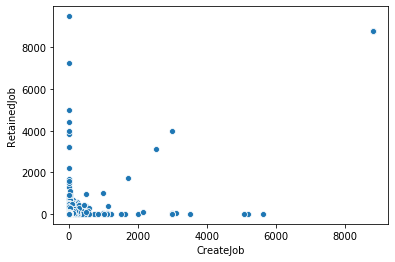

In [186]:
sns.scatterplot(x='CreateJob', y='RetainedJob',data=df);

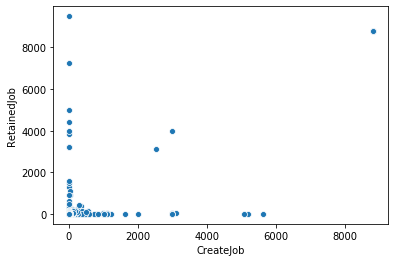

In [187]:
sns.scatterplot(x='CreateJob', y='RetainedJob',data=df.loc[df.NoEmp_150.notna()]);

In [188]:
df.loc[df.CreateJob==df.RetainedJob].shape[0]/df.shape[0]

0.48442442090653093

almost 50% of the data is identical in createJob and retainedJob: that can partially explain the 0.99 correlation value 

In [189]:
df.loc[df.CreateJob==0].shape[0]/df.shape[0]

0.699814494352532

70% of the loans have a 0 value for CreateJob

In [190]:
df.loc[df.RetainedJob==0].shape[0]/df.shape[0]

0.48979162866840753

almost 50% of the loans have a 0 value for RetainedJob

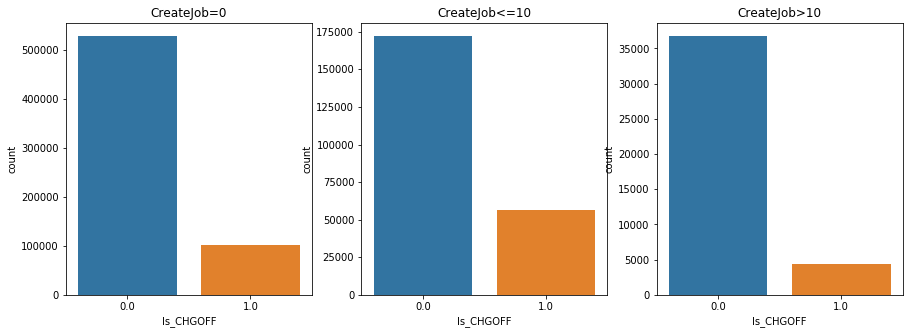

In [191]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

sns.countplot(df.loc[df.CreateJob==0].Is_CHGOFF,ax=ax1).set_title('CreateJob=0')
sns.countplot(df.loc[(df.CreateJob>0)&(df.CreateJob<=10)].Is_CHGOFF,ax=ax2).set_title('CreateJob<=10')
sns.countplot(df.loc[(df.CreateJob>10)].Is_CHGOFF, ax=ax3).set_title('CreateJob>10')

plt.show()

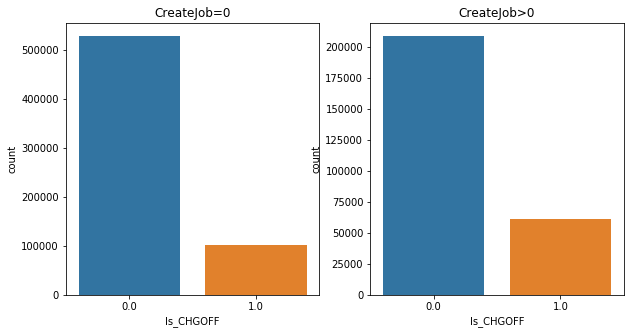

In [192]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.countplot(df.loc[df.CreateJob==0].Is_CHGOFF,ax=ax1).set_title('CreateJob=0')
sns.countplot(df.loc[(df.CreateJob>0)].Is_CHGOFF, ax=ax2).set_title('CreateJob>0')

plt.show()

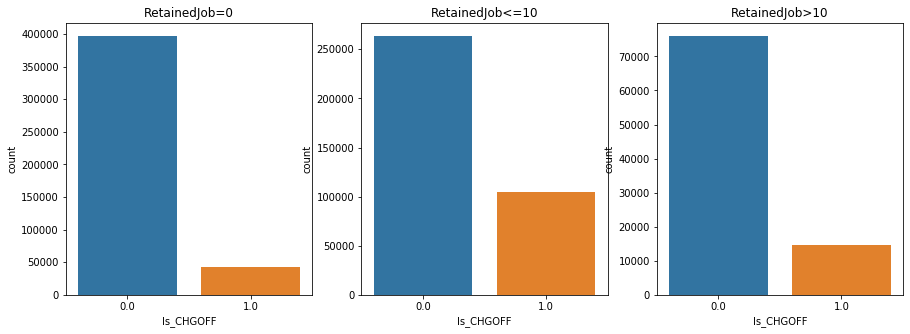

In [193]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

sns.countplot(df.loc[df.RetainedJob==0].Is_CHGOFF,ax=ax1).set_title('RetainedJob=0')
sns.countplot(df.loc[(df.RetainedJob>0)&(df.RetainedJob<=10)].Is_CHGOFF,ax=ax2).set_title('RetainedJob<=10')
sns.countplot(df.loc[(df.RetainedJob>10)].Is_CHGOFF, ax=ax3).set_title('RetainedJob>10')

plt.show()

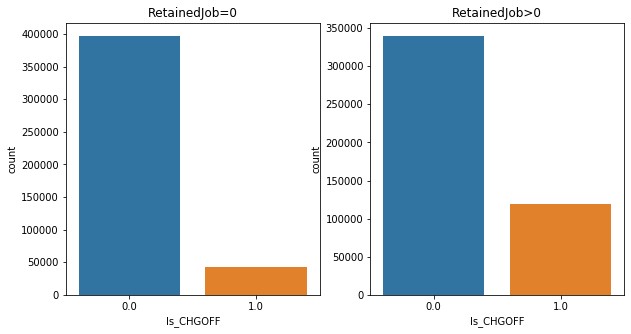

In [194]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.countplot(df.loc[df.RetainedJob==0].Is_CHGOFF,ax=ax1).set_title('RetainedJob=0')
sns.countplot(df.loc[(df.RetainedJob>0)].Is_CHGOFF, ax=ax2).set_title('RetainedJob>0')

plt.show()

The default rate depends on the whether jobs were created and or retained.
but high values for createJob and retainedJob are outliers: for small businesses there should not be more than approximately 150 employees, so maybe there are errors in the data.

I will only distinguish ==0 and > 0


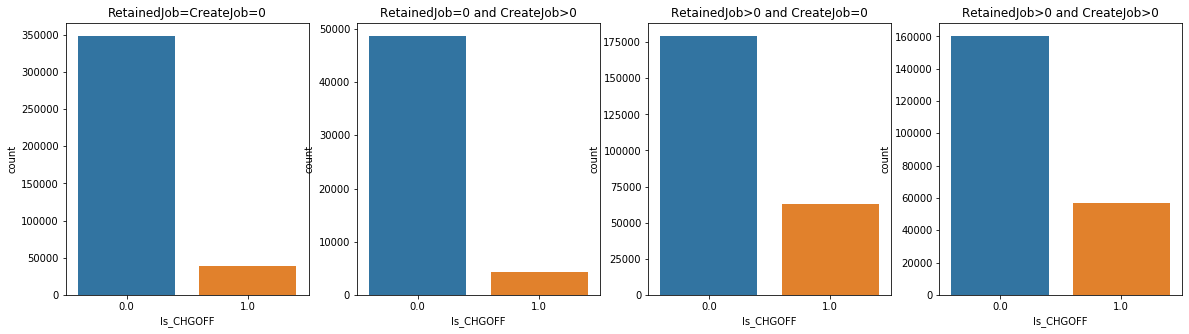

In [195]:
f, (ax1,ax2, ax3, ax4) = plt.subplots(1,4,figsize = (20,5))

sns.countplot(df.loc[(df.RetainedJob==0)&(df.CreateJob==0)].Is_CHGOFF,ax=ax1).set_title('RetainedJob=CreateJob=0')
sns.countplot(df.loc[(df.RetainedJob==0)&(df.CreateJob>0)].Is_CHGOFF, ax=ax2).set_title('RetainedJob=0 and CreateJob>0')
sns.countplot(df.loc[(df.RetainedJob>0)&(df.CreateJob==0)].Is_CHGOFF, ax=ax3).set_title('RetainedJob>0 and CreateJob=0')
sns.countplot(df.loc[(df.RetainedJob>0)&(df.CreateJob>0)].Is_CHGOFF, ax=ax4).set_title('RetainedJob>0 and CreateJob>0')
plt.show()

In [196]:
print('RetainedJob=CreateJob=0:',round(df.loc[(df.RetainedJob==0)&(df.CreateJob==0)].Is_CHGOFF.mean(),2))
print('RetainedJob=0 and CreateJob>0',round(df.loc[(df.RetainedJob==0)&(df.CreateJob>0)].Is_CHGOFF.mean(),2))
print('RetainedJob>0 and CreateJob=0',round(df.loc[(df.RetainedJob>0)&(df.CreateJob==0)].Is_CHGOFF.mean(),2))
print('RetainedJob>0 and CreateJob>0',round(df.loc[(df.RetainedJob>0)&(df.CreateJob>0)].Is_CHGOFF.mean(),2))

RetainedJob=CreateJob=0: 0.1
RetainedJob=0 and CreateJob>0 0.08
RetainedJob>0 and CreateJob=0 0.26
RetainedJob>0 and CreateJob>0 0.26


In [197]:
ttest_ind(df.loc[(df.RetainedJob==0)&(df.CreateJob==0), 'Is_CHGOFF'],
          df.loc[(df.RetainedJob==0)&(df.CreateJob>0), 'Is_CHGOFF'],
         equal_var=False)

Ttest_indResult(statistic=14.42017484978802, pvalue=4.49808811985223e-47)

In [198]:
ttest_ind(df.loc[(df.RetainedJob>0)&(df.CreateJob==0), 'Is_CHGOFF'],
          df.loc[(df.RetainedJob>0)&(df.CreateJob>0), 'Is_CHGOFF'],
         equal_var=False)

Ttest_indResult(statistic=-1.7570531731597856, pvalue=0.07890942164526368)

I am creating 3 categories : 
    - no jobs retained or created
    - jobs created but no jobs retained
    - jobs retained (no matter if jobs are created or not)

In [199]:
df['retain_create']=df.apply(lambda row: 'no_job' if (row['RetainedJob']==0)&(row['CreateJob']==0) 
else 'create_no_retain' if (row['RetainedJob']==0)&(row['CreateJob']>0) else 'retain_job', axis=1)

In [216]:
jobs_df = df[['retain_create','Is_CHGOFF']].groupby('retain_create',as_index=False).mean().sort_values('Is_CHGOFF',ascending=False)

In [217]:
jobs_df.rename(columns={'retain_create':'Category', 'Is_CHGOFF': 'Default_rate'},inplace=True)

In [218]:
jobs_df.Default_rate=jobs_df.Default_rate*100

In [219]:
round(jobs_df)

,Category,Default_rate
2,retain_job,26.0
1,no_job,10.0
0,create_no_retain,8.0


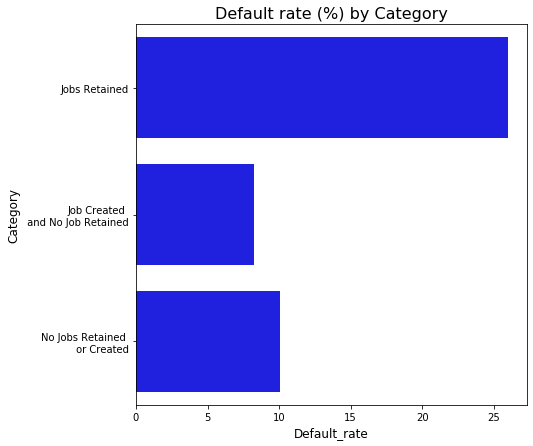

In [339]:
fig5, ax = plt.subplots(1,1,figsize=(7,7))

xlabels=['Jobs Retained','Job Created \n and No Job Retained','No Jobs Retained \n or Created']
sns.barplot(y='Category',x='Default_rate',data=jobs_df, color = 'blue',order=['retain_job','create_no_retain','no_job'],ax=ax)
ax.title.set_text('Default rate (%) by Category')
ax.title.set_size(16)
plt.yticks([0,1,2],labels=xlabels)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
plt.savefig('images/jobs.svg', format='svg')
plt.savefig('images/jobs.png', format='png')
plt.show()

In [224]:
cols_to_drop.extend(['CreateJob','RetainedJob'])
cols_for_dummies.append('retain_create')

I will try to use this feature in the model but I don't know if it is really usefull, 
and also, I don't know if this feature can be used to predict if a future loan will be paid in full or not: is it data that we know about beforehand, or is it data collected after the loan as been paid in full or defaulted ?

### UrbanRural

In [225]:
df.UrbanRural.value_counts()

1    470654
0    323167
2    105343
Name: UrbanRural, dtype: int64

In [226]:
df.UrbanRural.value_counts()/df.shape[0]

1    0.523435
0    0.359408
2    0.117157
Name: UrbanRural, dtype: float64

 0=undefined, 1=Urban and 2=Rural 
 
 so 0 is a missing value, this means that there is ~35% of missing values in this column.
 
 Where do these missing values come from ?
 
 UrbanRural is highly correlated to ApprovalFY

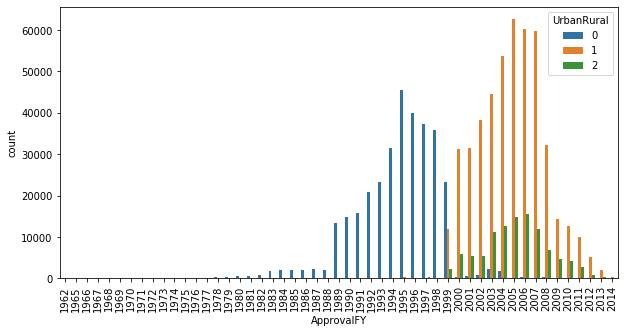

In [227]:
fig = plt.figure(figsize=(10,5))
ax=sns.countplot(x='ApprovalFY', hue='UrbanRural',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

from this, we see that before 1999, the information Urban/Rural about the business was mostly "undefined"

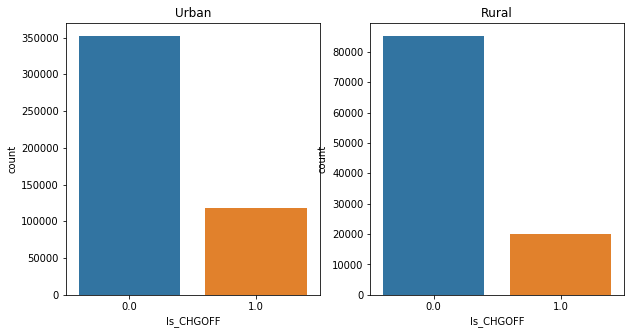

In [228]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.countplot(df.loc[df.UrbanRural==1].Is_CHGOFF,ax=ax1).set_title('Urban')
sns.countplot(df.loc[df.UrbanRural==2].Is_CHGOFF, ax=ax2).set_title('Rural')

plt.show()

In [229]:
round(df[['UrbanRural','Is_CHGOFF']].groupby('UrbanRural').mean().sort_values('Is_CHGOFF'),2)

,Is_CHGOFF
UrbanRural,
0,0.07
2,0.19
1,0.25


UrbanRural has an influence on the default rate, but 35% of the data is missing and can't be imputed because it corresponds to almost all the data from before 1999.

We can't drop the corresponding rows, it would erase 1/3 of the data.

So I will drop the column

In [230]:
cols_to_drop.append('UrbanRural')

### Term

In [231]:
df.Term.describe()

count    899164.000000
mean        110.773078
std          78.857305
min           0.000000
25%          60.000000
50%          84.000000
75%         120.000000
max         569.000000
Name: Term, dtype: float64

there are outliers, values that are higher than the highest term allowed by the SBA (25 years = 300 months)

maybe, the rules for the term have change through time ?

In [232]:
df.loc[df.Term<300].ApprovalFY.describe()

count    851332.000000
mean       2001.313298
std           5.875777
min        1965.000000
25%        1997.000000
50%        2003.000000
75%        2006.000000
max        2014.000000
Name: ApprovalFY, dtype: float64

In [233]:
df.loc[df.Term>300].ApprovalFY.describe()

count    3105.000000
mean     1998.961675
std         5.889512
min      1970.000000
25%      1996.000000
50%      1999.000000
75%      2003.000000
max      2013.000000
Name: ApprovalFY, dtype: float64

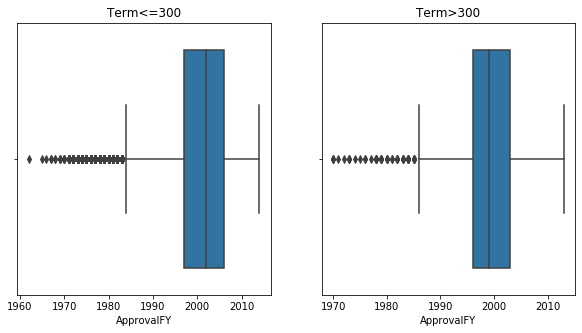

In [234]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.boxplot(x='ApprovalFY',data=df.loc[df.Term<=300],ax=ax1).set_title('Term<=300')
sns.boxplot(x='ApprovalFY',data=df.loc[df.Term>300], ax=ax2).set_title('Term>300')
plt.show()

the distribution is similar: the hypothesis is wrong.

Maybe, these exceptionally long terms are for large gross loans amounts ? (Term and GrAppv are correlated) 

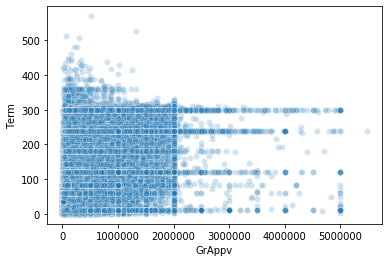

In [235]:
sns.scatterplot(x='GrAppv',y='Term',data=df,alpha=0.2);

the highest terms (>300 months) are for amounts < $2M

In [236]:
df.loc[df.Term>300].Is_CHGOFF.value_counts()

0.0    3016
1.0      89
Name: Is_CHGOFF, dtype: int64

In [237]:
df.loc[(df.Term>300)&(df.ApprovalFY>1989)].Is_CHGOFF.value_counts()

0.0    2956
1.0      24
Name: Is_CHGOFF, dtype: int64

In [238]:
print('the proportion of the data with term >300 months is {} %'.format(round(df.loc[df.Term>300].shape[0]/df.shape[0]*100,2)))

the proportion of the data with term >300 months is 0.35 %


I will drop the rows where the term is over 300 months

In [239]:
df['Term_300']=df.Term.copy()

In [240]:
df.loc[df.Term>300,'Term_300']=np.nan

In [241]:
cols_to_drop.append('Term')
cols_dropna_row.append('Term_300')

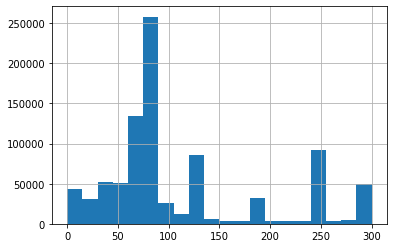

In [242]:
df.Term_300.hist(bins=20)

In [243]:
df[['Is_CHGOFF','Term_300']].groupby('Is_CHGOFF').describe()

Term_300                                                      
              count        mean        std  min   25%   50%    75%    max
Is_CHGOFF                                                                
0.0        733492.0  121.921110  78.813753  0.0  78.0  84.0  180.0  300.0
1.0        162567.0   56.644848  45.854066  0.0  29.0  49.0   69.0  300.0

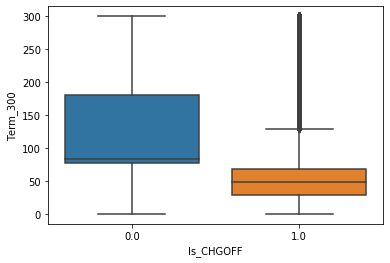

In [244]:
sns.boxplot(x=df.Is_CHGOFF, y=df.Term_300);

On average, Charged-off loans have a smaller term.

We saw that longuest loans (10 to 25 years) are for real estate acquisition or construction: maybe this is a factor: 

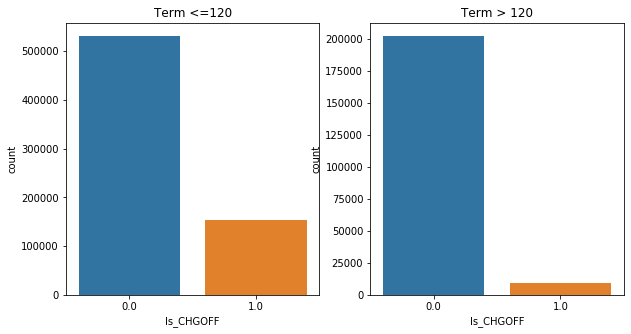

In [245]:
f5, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.countplot(df.loc[(df.Term_300<=120)].Is_CHGOFF,ax=ax1).set_title('Term <=120')
sns.countplot(df.loc[(df.Term_300>120)].Is_CHGOFF, ax=ax2).set_title('Term > 120')
plt.show()

- working capital loans are generally limited to 7 years (=84 months)

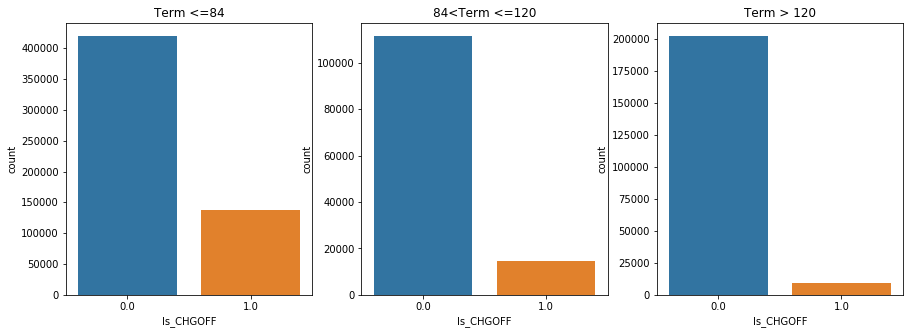

In [246]:
f6, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

sns.countplot(df.loc[(df.Term_300<=84)].Is_CHGOFF,ax=ax1).set_title('Term <=84')
sns.countplot(df.loc[(df.Term_300>84)&(df.Term_300<=120)].Is_CHGOFF,ax=ax2).set_title('84<Term <=120')
sns.countplot(df.loc[(df.Term_300>120)].Is_CHGOFF, ax=ax3).set_title('Term > 120')
plt.show()

the default rate decreases when the term increases

but I will only create 2 categories: RealEstate and not_RealEstate for the term >120 and <=120 respectively because only real estate and construction loans can have a term over 10 years = 120 months, whereas it is difficult to clearly assign the category 'working capital loan' to Term < 7 years because other loans term can be under 7 years

In [247]:
df['Is_RealEstate']=df.Term_300.apply(lambda x: 1 if x>120 else 0 if x>=0 else np.nan)

In [253]:
realestate_df = df[['Is_RealEstate','Is_CHGOFF']].groupby('Is_RealEstate',as_index=False).mean().sort_values('Is_CHGOFF',ascending=False)

In [254]:
realestate_df.rename(columns={'Is_RealEstate':'Is_RealEstate', 'Is_CHGOFF': 'Default_rate'},inplace=True)

In [255]:
realestate_df.Default_rate=realestate_df.Default_rate*100

In [256]:
realestate_df.Is_RealEstate=realestate_df.Is_RealEstate.map({1:'Real Estate',0:'Other'})

In [257]:
round(realestate_df)

,Is_RealEstate,Default_rate
0,Other,22.0
1,Real Estate,5.0


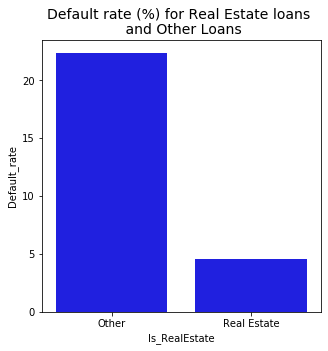

In [336]:
fig3, ax = plt.subplots(1,1,figsize=(5,5))

sns.barplot(x='Is_RealEstate',y='Default_rate',data=realestate_df, color = 'blue',ax=ax)
ax.title.set_text('Default rate (%) for Real Estate loans \n and Other Loans')
ax.title.set_size(14)
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
plt.savefig('images/realestate.svg', format='svg')
plt.savefig('images/realestate.png', format='png')
plt.show()

In [260]:
cols_dropna_row.remove('Term_300')

In [261]:
cols_to_drop.append('Term_300')

In [262]:
cols_dropna_row.append('Is_RealEstate')

### ChgOffPrinGr and BalanceGross 

As already said, ChgOffPrinGr is the charged-off amount: it cannot be used in a model for predicting if a loan will charge off.

In [263]:
cols_to_drop.append('ChgOffPrinGr')

We saw that BalanceGross might be a low variance column with a lot of 0 values

In [264]:
print('the proportion of 0 values in the BalanceGross column is {}%'.format(df.loc[df.BalanceGross==0].shape[0]/df.shape[0]*100))

the proportion of 0 values in the BalanceGross column is 99.99844299816274%


It is confirmed: this is a column with low variance: I will drop it

In [265]:
cols_to_drop.append('BalanceGross')

### DisbursementGross and GrAppv

Is there a difference between DisbursementGross and GrAppv ?
- are the 2 amounts always the same ?
- is it possible that the disbursed amount is greater than the approved amount ?

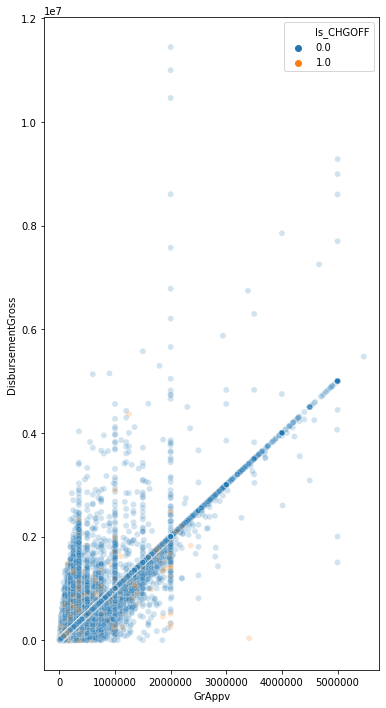

In [266]:
plt.figure(figsize=(6,12))
sns.scatterplot(x='GrAppv',y='DisbursementGross',data=df,hue='Is_CHGOFF',alpha=0.2);

In [267]:
print('The proportion of rows where GrAppv = DisbursementGross is {}% '.format(round(df.loc[df.DisbursementGross==df.GrAppv].shape[0]/df.shape[0]*100,1)))
print('The proportion of rows where GrAppv > DisbursementGross is {}% '.format(round(df.loc[df.DisbursementGross<df.GrAppv].shape[0]/df.shape[0]*100,1)))
print('The proportion of rows where GrAppv < DisbursementGross is {}% '.format(round(df.loc[df.DisbursementGross>df.GrAppv].shape[0]/df.shape[0]*100,1)))

The proportion of rows where GrAppv = DisbursementGross is 76.6% 
The proportion of rows where GrAppv > DisbursementGross is 6.0% 
The proportion of rows where GrAppv < DisbursementGross is 17.4% 


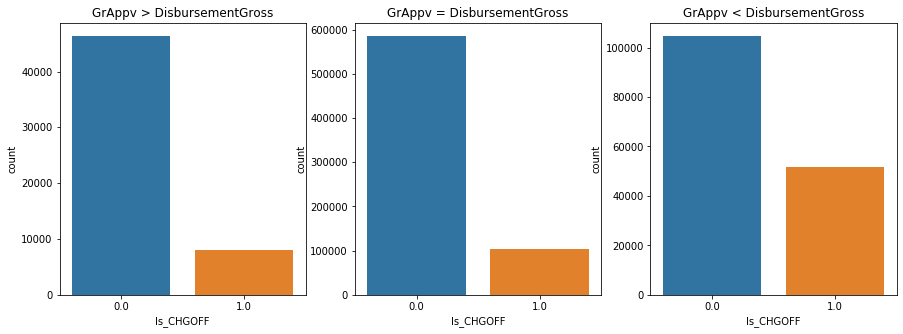

In [268]:
g6, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

sns.countplot(df.loc[df.DisbursementGross<df.GrAppv].Is_CHGOFF,ax=ax1).set_title('GrAppv > DisbursementGross')
sns.countplot(df.loc[df.DisbursementGross==df.GrAppv].Is_CHGOFF,ax=ax2).set_title('GrAppv = DisbursementGross')
sns.countplot(df.loc[df.DisbursementGross>df.GrAppv].Is_CHGOFF, ax=ax3).set_title('GrAppv < DisbursementGross')
plt.show()

- most of the values are the same in the 2 columns. 
- the portion of data where DisbursementGross > GrAppv has a much higher defaul rate ; but I don't understand why the disbursement Gross could be higher (up to 5 times) than the Gross amount of loan approved by the bank.

I think it is best to only consider the amount approved by the bank (and not the DisbursementGross) for a model that would be used to decide if the loan should be approved 

In [269]:
cols_to_drop.append('DisbursementGross')

### GrAppv and SBA_Appv 

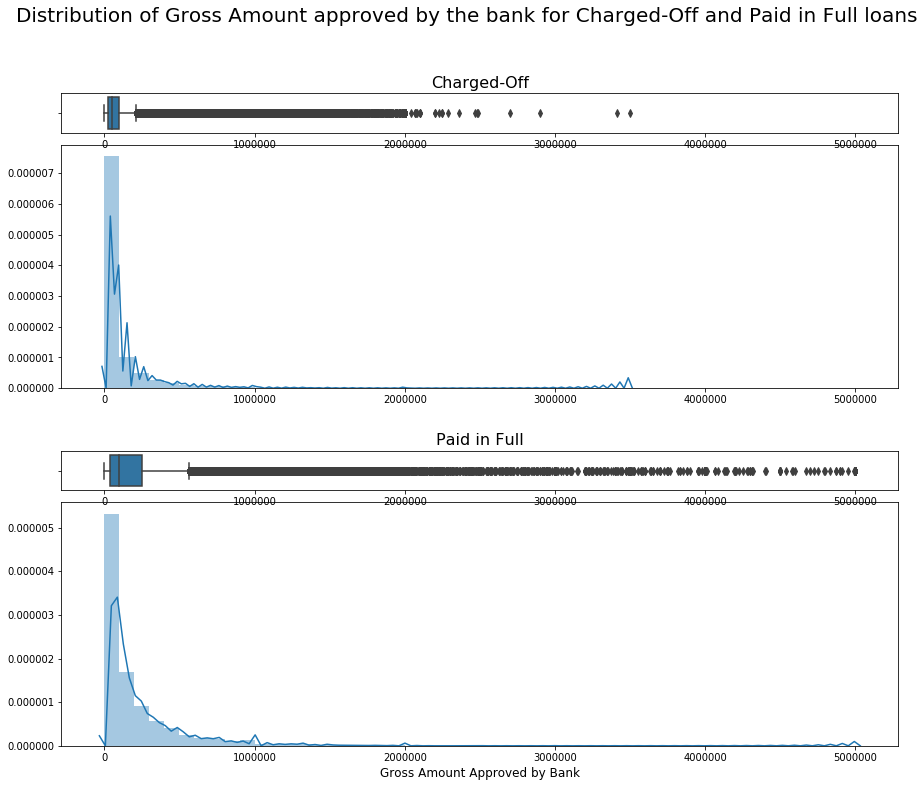

In [274]:
fig=plt.figure(figsize=(15,12))
grid=plt.GridSpec(13,1, wspace=0.4, hspace=0.3)

fig.suptitle('Distribution of Gross Amount approved by the bank for Charged-Off and Paid in Full loans', size=20)

yes_hist=fig.add_subplot(grid[1:6,:], sharex=no_hist)
yes_box=fig.add_subplot(grid[0,:], sharex=no_hist)


no_hist=fig.add_subplot(grid[8:13,:])
no_box=fig.add_subplot(grid[7,:], sharex=no_hist)


sns.boxplot(df.loc[(df.Is_CHGOFF==1)&(df.GrAppv<=5000000)].GrAppv, ax=yes_box).set_title('Charged-Off')
sns.distplot(df.loc[(df.Is_CHGOFF==1)&(df.GrAppv<=5000000)].GrAppv, ax=yes_hist, bins=35).set(xlabel='')
yes_box.set(xlabel='')
yes_box.title.set_size(16)

sns.boxplot(df.loc[(df.Is_CHGOFF==0)&(df.GrAppv<=5000000)].GrAppv, ax=no_box).set_title('Paid in Full')
sns.distplot(df.loc[(df.Is_CHGOFF==0)&(df.GrAppv<=5000000)].GrAppv, ax= no_hist,bins=50).set(xlabel='Gross Amount Approved by Bank')
no_box.set(xlabel='')
no_hist.xaxis.label.set_size(12)
no_box.title.set_size(16)

plt.savefig('images/amount.svg', format='svg')
plt.savefig('images/amount.png', format='png')

plt.show()

from the [document](https://www.sba.gov/sites/default/files/SDOLoanFactSheet_Oct_2011.pdf):

- **Guarantee Portion** - Under the 7(a) guaranteed loan program SBA typically guarantees from 50% to 85% of an eligible bankloan up to a maximum guaranty amount of \\$3,750,000. The exact percentage of the guaranty depends on a variety of factors such as size of loan and which SBA program is to be used. This will be worked out between the SBA and your bank.
- **Amounts** - The maximum loan amount is \\$5 million. The total SBA guarantee for any one borrower may not exceed
\\$3,750,000. 

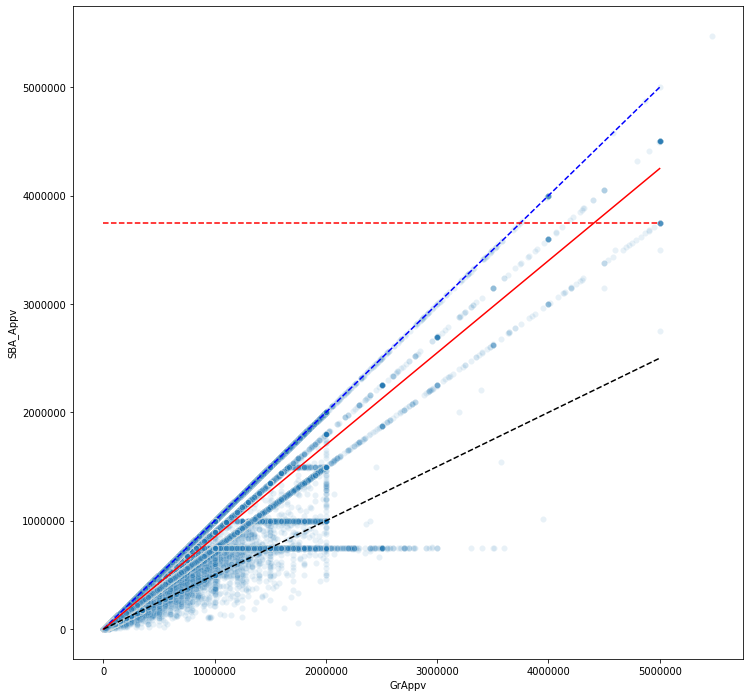

In [275]:
m=5000000
x=[0,m]
y1=[0,0.85*m]
y2=[0,0.5*m]
y3=[3750000,3750000]


plt.figure(figsize=(12,12))
sns.scatterplot(x='GrAppv',y='SBA_Appv',data=df,alpha=0.1)
plt.plot(x,x,'b--')
plt.plot(x,y1,'r-')
plt.plot(x,y2,'k--')
plt.plot(x,y3,'r--');

- This graph illustrates the very high correlation between GrAppv and SBA_Appv.
- we can see 3 lines that represent the most common percentages of GrAppv taken by SBA_Appv (it seems to be something like 100%, 90% and 70%)
- SBA_Appv is always lower or equal to GrAppv
- there are loans where the SBA_Appv is less than 50% of the GrAppv
- only a few loans have SBA_Appv > 3750000

The fact that the SBA guaranties a large portion of the loan decreases the risk for the bank (loses less money in case of default), but it is a factor that can help predict if the loan will charge-off ?

I create the feature 'SBA_portion' to investivate this.

In [276]:
df['SBA_portion']=df.SBA_Appv/df.GrAppv

In [277]:
df.SBA_portion.describe()

count    899164.000000
mean          0.709385
std           0.173781
min           0.028140
25%           0.500000
50%           0.750000
75%           0.850000
max           1.000000
Name: SBA_portion, dtype: float64

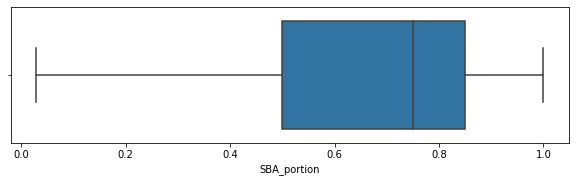

In [278]:
plt.figure(figsize=(10,2.5))
sns.boxplot(df.SBA_portion);

In [279]:
df[['SBA_portion','Is_CHGOFF']].groupby('Is_CHGOFF').describe()

SBA_portion                                                   
                count      mean       std      min  25%   50%   75%  max
Is_CHGOFF                                                               
0.0          736508.0  0.723721  0.172608  0.02814  0.5  0.75  0.85  1.0
1.0          162656.0  0.644473  0.164000  0.12190  0.5  0.50  0.85  1.0

Charged_off loans have an average SBA_portion (0.64) lower than the paid in full loans (0.72)

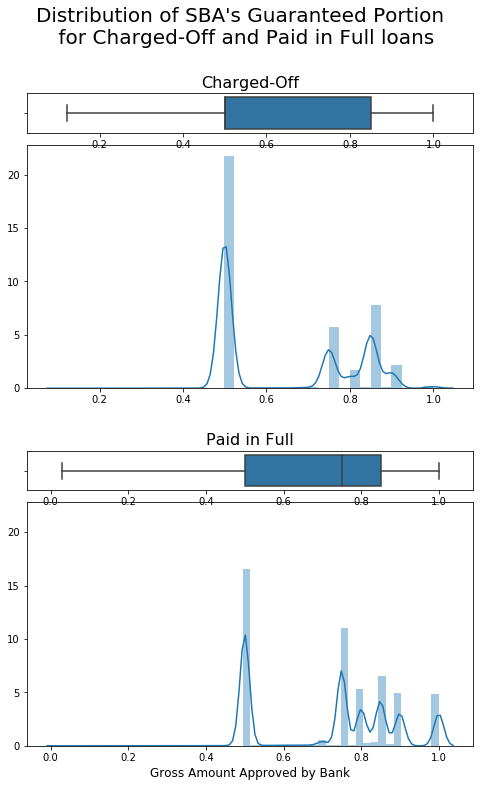

In [337]:
fig=plt.figure(figsize=(8,12))
grid=plt.GridSpec(13,1, wspace=0.4, hspace=0.3)

fig.suptitle("Distribution of SBA's Guaranteed Portion \n for Charged-Off and Paid in Full loans", size=20)

yes_hist=fig.add_subplot(grid[1:6,:])
yes_box=fig.add_subplot(grid[0,:], sharex=yes_hist)


no_hist=fig.add_subplot(grid[8:13,:],sharey=yes_hist)
no_box=fig.add_subplot(grid[7,:], sharex=no_hist)


sns.boxplot(df.loc[(df.Is_CHGOFF==1)].SBA_portion, ax=yes_box).set_title('Charged-Off')
sns.distplot(df.loc[(df.Is_CHGOFF==1)].SBA_portion, ax=yes_hist, bins=35).set(xlabel='')
yes_box.set(xlabel='')
yes_box.title.set_size(16)

sns.boxplot(df.loc[(df.Is_CHGOFF==0)].SBA_portion, ax=no_box).set_title('Paid in Full')
sns.distplot(df.loc[(df.Is_CHGOFF==0)].SBA_portion, ax= no_hist,bins=50).set(xlabel='Gross Amount Approved by Bank')
no_box.set(xlabel='')
no_hist.xaxis.label.set_size(12)
no_box.title.set_size(16)

plt.savefig('images/portion.svg', format='svg')
plt.savefig('images/portion.png', format='png')

plt.show()

The median SBA_portion is much lower for charged-off loans (0.5) than  paid in full loans (0.75)

In [284]:
print('proportion of SBA_portion inferior to 50% is :{}%'.format(round(df.loc[df.SBA_portion<0.5].shape[0]/df.shape[0]*100,2)))
print('proportion of SBA_portion equal to 50% is :{}%'.format(round(df.loc[df.SBA_portion==0.5].shape[0]/df.shape[0]*100,2)))
print('proportion of SBA_portion equal to 50%  is :{}% for charged_off loans'.format(round(df.loc[(df.SBA_portion==0.5)&(df.Is_CHGOFF==1)].shape[0]/df.loc[df.Is_CHGOFF==1].shape[0]*100,2)))
print('proportion of SBA_portion equal to 50%  is :{}% for paid in full loans'.format(round(df.loc[(df.SBA_portion==0.5)&(df.Is_CHGOFF==0)].shape[0]/df.loc[df.Is_CHGOFF==0].shape[0]*100,2)))

proportion of SBA_portion inferior to 50% is :0.28%
proportion of SBA_portion equal to 50% is :36.25%
proportion of SBA_portion equal to 50%  is :54.5% for charged_off loans
proportion of SBA_portion equal to 50%  is :32.22% for paid in full loans


In [285]:
df.loc[df.SBA_portion==0.5].GrAppv.describe()

count    3.259550e+05
mean     5.743163e+04
std      8.979838e+04
min      2.000000e+02
25%      2.000000e+04
50%      3.500000e+04
75%      6.450000e+04
max      2.000000e+06
Name: GrAppv, dtype: float64

SBA_portion = 50% correspond to rather low GrAppv: 
more than half of the charged-off loans have a SBA_portion = 50% (which is the lowest portion according to the document cited above.

it can be explained by the fact that if the SBA guaranties 50% of the amount only, they might think that the risk of defaulting is high and so does the bank, who would not approve a high gross amount

In [286]:
cols_to_drop.append('SBA_Appv')

### ApprovalFY, ApprovalDate and DisbursementDate

Dates, as is, should not be features of a model to predict future loans, but we can use them to:
- narrow the time frame: only use data from a defined time frame in the model
- add informations about the economy at certain periods (expansion, recession...)

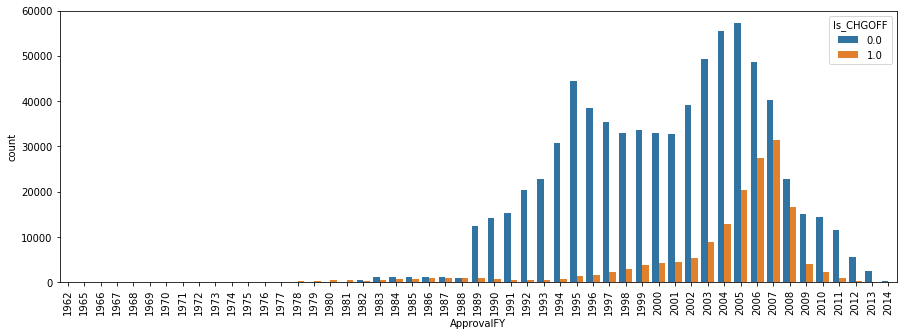

In [287]:
fig = plt.figure(figsize=(15,5))
ax=sns.countplot(x='ApprovalFY', hue='Is_CHGOFF',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

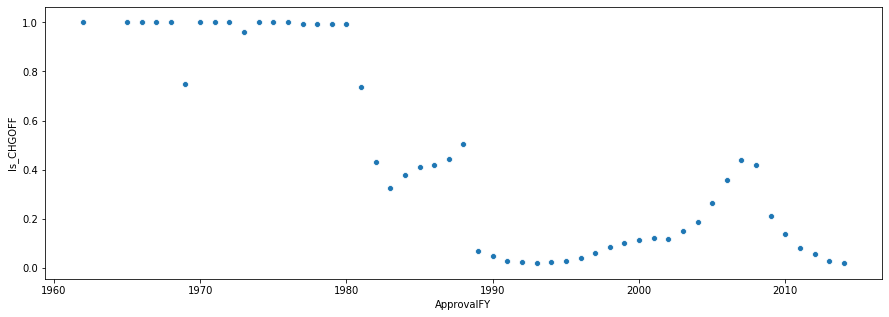

In [288]:
fig = plt.figure(figsize=(15,5))
sns.scatterplot(x='ApprovalFY',y='Is_CHGOFF',data=df[['ApprovalFY','Is_CHGOFF']].groupby('ApprovalFY',as_index=False).mean());

- Not much more than 1.6% of the data are loans approved before 1989 
- These loans have a high default rate (before 1980 the default rate per year is almost 100%)
- These loans don't have revolving lines of credit


**We will drop all the data prior to 1989**

In [289]:
df['Is_1989_up']=df.ApprovalFY.apply(lambda x: 1 if x>1989 else np.nan)

In [290]:
cols_dropna_row.append('Is_1989_up')

From these graphs we can see that the default rate per year increases untill around 2008.

In 2008 starts the Great Recession (dec 2007- june 2009). The decrease of the default rate per year could be explained by the fact that in a Recession, bank might be more carefull about the loans they approve and maybe increased the guaranties they need to approve a loan

I will add a feature stating whether the loan has been going on during the Great Recession ; with this, we will see if the recession has an impact on the default rate, and if it does, it will help predict loans for future recession (2020 for example...)

But we can't predict a recession a long time before it happens, so I will only take into account in this feature the **loans that started during the Great Recession**.

To be more precise, I will use either ApprovalDate or DisbursementDate and not ApprovalFY. To know which one is more appropriate, I will take a look at these 2 dates first:

- is the fiscal year of approval always the same as the year of approval ?
- is the approvalDate always close to the DisbursementDate ?

In [292]:
df.apply(lambda row: row['ApprovalFY']-row['ApprovalDate_date'].year ,axis=1).value_counts()

 0      691016
 1      208135
-99          7
-100         6
dtype: int64

- For most loans, ApprovalFY is the same as year of ApprovalDate
- 1 year difference could be explained by the fact that these loans were approved at the end of a year N, and the delay for the paperwork makes N+1 the fiscal year 
- there seems to be a problem for 7+6 rows

In [293]:
df.loc[df.apply(lambda row: row['ApprovalFY']-row['ApprovalDate_date'].year<0 ,axis=1)][['ApprovalFY','ApprovalDate','ApprovalDate_date']]

,ApprovalFY,ApprovalDate,ApprovalDate_date
38920,1962,7-Dec-61,2061-12-07
44932,1965,27-Nov-64,2064-11-27
49244,1966,18-May-66,2066-05-18
434334,1967,28-Feb-67,2067-02-28
683481,1968,20-Jul-67,2067-07-20
689069,1967,25-Apr-67,2067-04-25
697801,1968,9-Feb-68,2068-02-09
720402,1969,3-Dec-68,2068-12-03
726149,1969,28-Apr-69,2069-04-28
732056,1969,24-Sep-68,2068-09-24


the problem comes from the fact that when 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.


even if I will drop these rows, I am correcting the problem:

In [294]:
from datetime import timedelta

In [295]:
df.loc[df.apply(lambda row: row['ApprovalFY']-row['ApprovalDate_date'].year<0 ,axis=1),'ApprovalDate_date'] -= timedelta(days=365.25*100)

In [296]:
df.apply(lambda row: row['ApprovalFY']-row['ApprovalDate_date'].year ,axis=1).value_counts()

0    691022
1    208142
dtype: int64

what is the reason for a fiscal year = year+1 ?

In [297]:
df.loc[df.apply(lambda row: row['ApprovalFY']-row['ApprovalDate_date'].year==1 ,axis=1)].ApprovalDate_date.dt.month.value_counts().sort_index()

7        11
8        24
9        19
10    69757
11    68400
12    69931
Name: ApprovalDate_date, dtype: int64

most of (fiscal_year = year+1) have been approved in the last trimester (oct-nov-dec), but a few have been approved in july-august-september

In [298]:
df.loc[df.apply(lambda row: row['ApprovalFY']-row['ApprovalDate_date'].year==0 ,axis=1)].ApprovalDate_date.dt.month.value_counts().sort_index()

1    67084
2    66342
3    83628
4    80207
5    77194
6    78290
7    76476
8    78752
9    83049
Name: ApprovalDate_date, dtype: int64

none of the (fiscal_year =year) have been approved in the last trimester

What about DisbursementDate ?

In [299]:
df.apply(lambda row: row['DisbursementDate_date'].year - row['ApprovalFY'] ,axis=1).value_counts()

 0.0      699144
-1.0       89180
 1.0       88014
 2.0       12876
 3.0        4828
 4.0        1378
 5.0         763
 6.0         325
 7.0          82
 8.0          65
 9.0          58
 10.0         55
-2.0           4
 11.0          4
 12.0          4
 100.0         4
-10.0          2
 99.0          2
 24.0          2
 25.0          1
-3.0           1
 13.0          1
 66.0          1
 26.0          1
 20.0          1
dtype: int64

- we have the same error (100 and 99 correspond to the error 20** instead of 19**)
- but there are a lot of other values, most of them are positive: disbursement occurs after approval

In [300]:
df.loc[df.apply(lambda row: row['DisbursementDate_date'].year-row['ApprovalFY'] >=99 ,axis=1),'DisbursementDate_date'] -= timedelta(days=365.25*100)

for the negative values (disbursement date before the approval date), maybe it involves a revolving line of credit ?

In [301]:
df.loc[df.apply(lambda row: row['DisbursementDate_date'].year-row['ApprovalFY'] <-1 ,axis=1)][['ApprovalDate','ApprovalFY','DisbursementDate','Is_RevLineCr']]

,ApprovalDate,ApprovalFY,DisbursementDate,Is_RevLineCr
30748,13-May-97,1997,24-Oct-95,0.0
296330,6-Jul-99,1999,5-Sep-97,0.0
696091,1-Mar-04,2004,8-Jul-02,0.0
896097,29-Jan-07,2007,31-May-97,0.0
896105,29-Jan-97,1997,24-Oct-95,0.0
898373,21-Feb-97,1997,1-Apr-87,0.0
899107,26-Mar-01,2001,31-Jan-98,0.0


it doesn't make any sense that the loan would be disbursed up to 10 years before the approval !

In [302]:
df.loc[df.apply(lambda row: row['DisbursementDate_date'].year-row['ApprovalFY'] >10 ,axis=1)][['ApprovalDate','ApprovalFY','DisbursementDate','Is_RevLineCr','Term']]

,ApprovalDate,ApprovalFY,DisbursementDate,Is_RevLineCr,Term
54648,23-Aug-82,1982,17-Sep-48,0.0,120
234738,25-Jun-86,1986,28-Jul-10,0.0,19
238712,31-Jul-86,1986,7-Jun-12,0.0,55
244776,29-Sep-86,1986,15-Nov-10,0.0,46
337110,9-Dec-88,1989,29-May-01,0.0,178
342280,17-Feb-89,1989,29-Feb-00,0.0,84
357254,25-Jul-89,1989,31-Dec-02,0.0,240
379815,31-Mar-00,2000,14-Apr-20,0.0,60
381023,20-Dec-89,1990,31-Dec-02,0.0,252
415826,4-Apr-90,1990,30-Sep-02,0.0,120


there might be typo errors (48 instead of 84 ? (20)20 instead of (20)02 ? (20)0* instead of (19)9* ?

there are too many errors in the disbursementDate column, I will use the ApprovalDate column to create the feature about the Recession time

In [303]:
cols_to_drop.append('DisbursementDate_date')

In [304]:
from datetime import datetime

In [305]:
begin_08=datetime(2007,12,1)
end_08=datetime(2009,7,1)

In [306]:
df['Is_Recession_08']=df.apply(lambda row: 0 if row['ApprovalDate_date']>end_08 else 0 if row['ApprovalDate_date']<begin_08 else 1,axis=1)

In [307]:
df.Is_Recession_08.sum()/df.shape[0]

0.04877308255223741

In [308]:
pd.crosstab(df.Is_CHGOFF,df.Is_Recession_08,rownames=['CHGOFF'],colnames=['Recession'],normalize='columns')

Recession,0,1
CHGOFF,,
0.0,0.82737,0.657873
1.0,0.17263,0.342127


Early 2000s recession (Mar 2001–Nov 2001)

In [309]:
begin_01=datetime(2001,3,1)
end_01=datetime(2001,12,1)

In [310]:
df['Is_Recession_01']=df.apply(lambda row: 0 if row['ApprovalDate_date']>end_01 else 0 if row['ApprovalDate_date']<begin_01 else 1,axis=1)

In [311]:
df.Is_Recession_01.sum()/df.shape[0]

0.03357118389971129

In [312]:
pd.crosstab(df.Is_CHGOFF,df.Is_Recession_01,rownames=['CHGOFF'],colnames=['Recession'],normalize='columns')

Recession,0,1
CHGOFF,,
0.0,0.816978,0.880276
1.0,0.183022,0.119724


Early 1990s recession in the United States (July 1990–Mar 1991)

In [313]:
begin_90=datetime(1990,7,1)
end_90=datetime(1991,4,1)

In [314]:
df['Is_Recession_90']=df.apply(lambda row: 0 if row['ApprovalDate_date']>end_90 else 0 if row['ApprovalDate_date']<begin_90 else 1,axis=1)

In [315]:
df.Is_Recession_90.sum()/df.shape[0]

0.012205782259965924

In [316]:
pd.crosstab(df.Is_CHGOFF,df.Is_Recession_90,rownames=['CHGOFF'],colnames=['Recession'],normalize='columns')

Recession,0,1
CHGOFF,,
0.0,0.817337,0.962005
1.0,0.182663,0.037995


only the Great Recession of 2008 has a significant increase in the default rate. 

Recessions in the early 1990s and early 2000 show a significant decrease in the default rate.

maybe it is because they didn't last as long as the Great Recession (8 months compared to 19 months) and/or the GDP decline was not as deep (-1.4% and -0.3% compared to -5.1%) ([source](https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States))

In [319]:
recession_df = df[['Is_Recession_08','Is_CHGOFF']].groupby('Is_Recession_08',as_index=False).mean().sort_values('Is_CHGOFF',ascending=False)

In [320]:
recession_df.rename(columns={'Is_Recession_08':'Is_Recession_08', 'Is_CHGOFF': 'Default_rate'},inplace=True)

In [321]:
recession_df.Default_rate=recession_df.Default_rate*100

In [322]:
recession_df.Is_Recession_08=recession_df.Is_Recession_08.map({1:'Yes',0:'No'})

In [323]:
round(recession_df)

,Is_Recession_08,Default_rate
1,Yes,34.0
0,No,17.0


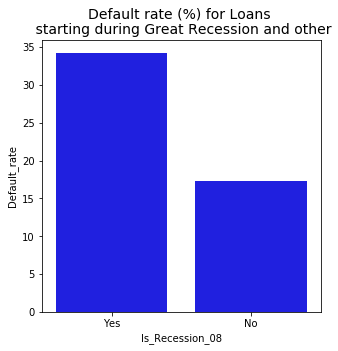

In [338]:
fig10, ax = plt.subplots(1,1,figsize=(5,5))

sns.barplot(x='Is_Recession_08',y='Default_rate',data=recession_df, color = 'blue',ax=ax)
ax.title.set_text('Default rate (%) for Loans \n starting during Great Recession and other')
ax.title.set_size(14)
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
plt.savefig('images/recession.svg', format='svg')
plt.savefig('images/recession.png', format='png')
plt.show()

In [325]:
cols_to_drop.extend(['ApprovalDate_date','Is_Recession_01','Is_Recession_90','ApprovalFY'])

In [326]:
df2=df.drop(cols_to_drop,axis=1)

In [327]:
df2.shape

(899164, 12)

In [328]:
df2.isna().sum()

State                  1
GrAppv                 0
Is_RevLineCr           0
Is_CHGOFF              0
Is_New              1170
NAICS_sector           0
NoEmp_150           3203
retain_create          0
Is_RealEstate       3105
SBA_portion            0
Is_1989_up         27963
Is_Recession_08        0
dtype: int64

In [329]:
df2.dropna(subset=cols_dropna_row,axis=0,inplace=True)

In [330]:
df2.shape

(864283, 12)

In [331]:
df2.drop(['Is_1989_up'],axis=1,inplace=True)

In [332]:
df2.shape

(864283, 11)

In [333]:
df2.to_csv('loans_clean.csv', index=False)

In [334]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864283 entries, 0 to 899163
Data columns (total 11 columns):
State              864283 non-null object
GrAppv             864283 non-null float64
Is_RevLineCr       864283 non-null float64
Is_CHGOFF          864283 non-null float64
Is_New             864283 non-null float64
NAICS_sector       864283 non-null object
NoEmp_150          864283 non-null float64
retain_create      864283 non-null object
Is_RealEstate      864283 non-null float64
SBA_portion        864283 non-null float64
Is_Recession_08    864283 non-null int64
dtypes: float64(7), int64(1), object(3)
memory usage: 79.1+ MB
